<a href="https://colab.research.google.com/github/paolominguzzi/AI_Supply_Chain/blob/master/Market_Research_and_Inventory_Analysis_Tilopozov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Market Research and Inventory Analysis Tilopozov4


Analisis demostrativo, predictivo y prescriptivo de los volumenes diarios para luego predecir quiebres de inventario por mercado y para estudiar la proespeccion de mercado en Antofagasta

**Objective**: Develop a comprehensive market research analysis focusing on daily inventory volumes, predicting potential stock-outs by market and region. The goal is to generate a prescriptive market analysis to provide actionable recommendations for producers. This will help them cultivate the best crops to achieve optimal sales prices while addressing critical inventory gaps and ensuring local market supply stability.

**Steps in the Analysis:**

**Daily Volume Analysis:**
Aggregate daily inventory volumes by market and region.
Identify trends and patterns in supply fluctuations.

**Inventory Stock-Out Prediction:**

Apply machine learning models (Random Forest and Deep Q-Learning) to predict potential inventory stock-outs.
Highlight products at risk of critical inventory levels for targeted intervention.

**Prescriptive Market Recommendations:**

Analyze inventory-critical products across local markets.
Generate recommendations for producers on which crops to cultivate.
Ensure recommendations align with local market demands and high-value crops for better pricing.

**Visualizations and Reporting:**

Create clear visualizations of daily volume trends, stock-out predictions, and critical inventory levels.
Provide actionable insights in the form of graphical reports for producers and stakeholders.

**Outcome:**
This analysis empowers producers to make informed decisions about crop selection and market supply strategies, ensuring a balance between local market needs and profitability. The approach ensures that critical gaps in inventory are addressed, minimizing risks of stock-outs while maximizing returns for farmers.


# **Step 1: Set Up Your Environment**

In [1]:
!pip install pandas matplotlib scikit-learn tensorflow

# **Step 2: Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import deque
import random

# **Step 3: Load Your Dataset**

In [3]:
from google.colab import files

# Upload your files
uploaded = files.upload()

Saving PreciosdiariostodoslosproductossinIVA.xlsx to PreciosdiariostodoslosproductossinIVA.xlsx


# Load dataset

Load the data into Pandas DataFrames

In [6]:
import pandas as pd

# Load Excel file
file_name = 'PreciosdiariostodoslosproductossinIVA.xlsx'  # Replace with your file name
data = pd.read_excel(file_name, sheet_name=None)  # Load all sheets into a dictionary of DataFrames

# Example: If there's a specific sheet you want
df = pd.read_excel(file_name, sheet_name='series-historicas')  # Replace 'Sheet1' with the actual sheet name

In [7]:
# View the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

        Fecha                           Mercado Producto         Variedad  \
0  20/11/2023  Agrícola del Norte S.A. de Arica      Ají          Inferno   
1  20/11/2023  Agrícola del Norte S.A. de Arica      Ají          Inferno   
2  20/11/2023  Agrícola del Norte S.A. de Arica  Brócoli  Sin especificar   
3  20/11/2023  Agrícola del Norte S.A. de Arica  Brócoli  Sin especificar   
4  20/11/2023  Agrícola del Norte S.A. de Arica  Brócoli  Sin especificar   

   Calidad                   Procedencia  Volumen  Precio mínimo  \
0  Primera  Región de Arica y Parinacota      200     21008.4033   
1  Segunda  Región de Arica y Parinacota      280     17647.0588   
2  Primera  Región de Arica y Parinacota      300       504.2016   
3  Segunda  Región de Arica y Parinacota      650       336.1344   
4  Tercera  Región de Arica y Parinacota      500       252.1008   

   Precio maximo  Precio promedio ponderado Unidad de comercialización  
0     21848.7394                 21218.4873            

In [8]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Dataset Info
print("Dataset Info:")
print(df.info())  # Provides information about columns, data types, and memory usage

# Statistical Profile
print("\nStatistical Profile:")
print(df.describe(include='all'))  # Includes descriptive statistics for all columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188338 entries, 0 to 188337
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Fecha                       188338 non-null  object 
 1   Mercado                     188338 non-null  object 
 2   Producto                    188338 non-null  object 
 3   Variedad                    188338 non-null  object 
 4   Calidad                     188338 non-null  object 
 5   Procedencia                 188338 non-null  object 
 6   Volumen                     188338 non-null  int64  
 7   Precio mínimo               188338 non-null  float64
 8   Precio maximo               188338 non-null  float64
 9   Precio promedio ponderado   188338 non-null  float64
 10  Unidad de comercialización  188338 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 15.8+ MB
None

Statistical Profile:
             Fecha             

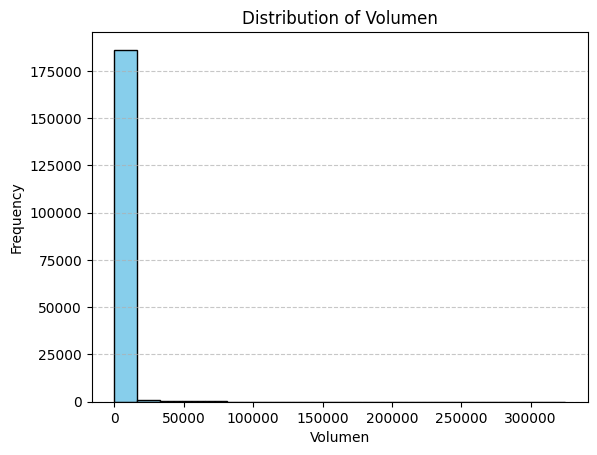

In [9]:
import matplotlib.pyplot as plt

# Create a histogram of the 'Volumen' column
plt.hist(df['Volumen'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Volumen')
plt.xlabel('Volumen')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Assuming your dataset file is named 'PreciosdiariostodoslosproductossinIVA.xlsx'
dataset_path = os.path.join(current_directory, 'PreciosdiariostodoslosproductossinIVA.xlsx')
print(f"Dataset path: {dataset_path}")

Current working directory: /content
Dataset path: /content/PreciosdiariostodoslosproductossinIVA.xlsx


Install the necessary Python libraries for data analysis:

In [10]:
!pip install pandas numpy matplotlib scikit-learn

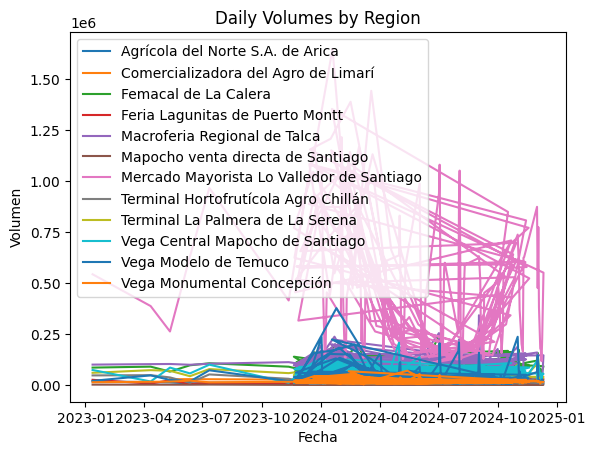

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by market and date
region_group = df.groupby(['Mercado', 'Fecha'])['Volumen'].sum().reset_index()

# Convert 'Fecha' column to datetime with explicit format
region_group['Fecha'] = pd.to_datetime(region_group['Fecha'], format='%d/%m/%Y', errors='coerce')

# Filter out rows with invalid dates (NaT) after conversion
region_group = region_group.dropna(subset=['Fecha'])

# Plot daily volumes for each market
for region in region_group['Mercado'].unique():
    region_data = region_group[region_group['Mercado'] == region]
    plt.plot(region_data['Fecha'], region_data['Volumen'], label=region)

plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Daily Volumes by Region')
plt.legend()
plt.show()

Visualize volumes by product and region:

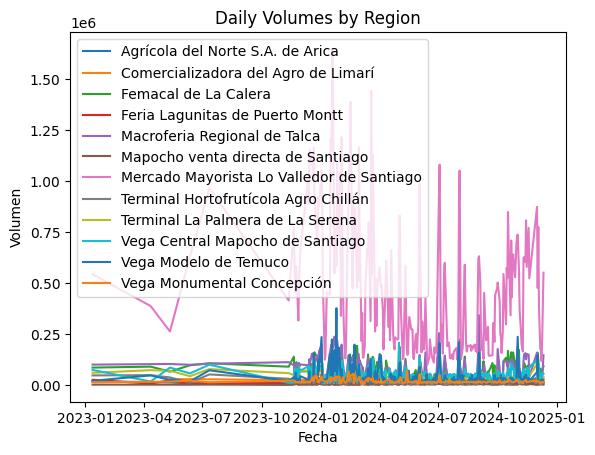

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your existing code to load the data) ...

# Convert 'Fecha' column to datetime objects with the correct format
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')  # Specify the format as day/month/year

# Example visualization: Daily volumes by region
region_group = df.groupby(['Mercado', 'Fecha'])['Volumen'].sum().reset_index()

for region in region_group['Mercado'].unique():
    region_data = region_group[region_group['Mercado'] == region]
    plt.plot(region_data['Fecha'], region_data['Volumen'], label=region)

plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Daily Volumes by Region')
plt.legend()
plt.show()

Predict Inventory Breaks

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Aggregate daily volumes for forecasting
time_series_data = df.groupby('Fecha')['Volumen'].sum().reset_index()

# Split into training and testing sets
train, test = train_test_split(time_series_data, test_size=0.2, shuffle=False)

# Train a simple model
model = RandomForestRegressor()
model.fit(train[['Fecha']], train['Volumen'])

# Predict on test data
predictions = model.predict(test[['Fecha']])
mse = mean_squared_error(test['Volumen'], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 200776296924.73203


Mean Squared Error: 201051532002.7572


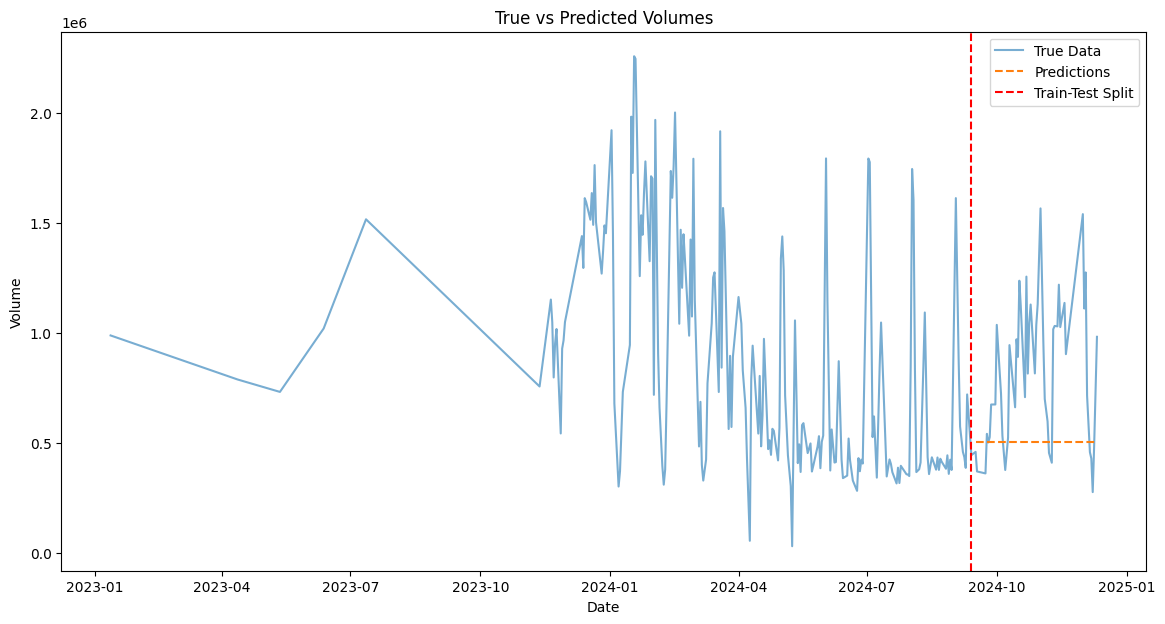

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Aggregate daily volumes for forecasting
time_series_data = df.groupby('Fecha')['Volumen'].sum().reset_index()

# Convert 'Fecha' to a numerical format (if not already done)
time_series_data['Fecha'] = pd.to_datetime(time_series_data['Fecha'])
time_series_data['Fecha_numeric'] = (time_series_data['Fecha'] - time_series_data['Fecha'].min()).dt.days

# Split into training and testing sets
train, test = train_test_split(time_series_data, test_size=0.2, shuffle=False)

# Train a simple model
model = RandomForestRegressor()
model.fit(train[['Fecha_numeric']], train['Volumen'])

# Predict on test data
test['Predictions'] = model.predict(test[['Fecha_numeric']])
mse = mean_squared_error(test['Volumen'], test['Predictions'])
print(f'Mean Squared Error: {mse}')

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Fecha'], time_series_data['Volumen'], label='True Data', alpha=0.6)
plt.plot(test['Fecha'], test['Predictions'], label='Predictions', linestyle='--')
plt.axvline(x=train['Fecha'].max(), color='r', linestyle='--', label='Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('True vs Predicted Volumes')
plt.legend()
plt.show()

Identify potential inventory breaks

In [ ]:
# Define a threshold for critical volume
threshold = time_series_data['Volumen'].mean() - time_series_data['Volumen'].std()

# Identify days with critical inventory levels
critical_days = time_series_data[time_series_data['Volumen'] < threshold]
print("Critical Inventory Days:")
print(critical_days)

Critical Inventory Days:
         Fecha  Volumen  Fecha_numeric
31  2024-01-07   300061            360
32  2024-01-08   370040            361
52  2024-02-08   308546            392
72  2024-03-07   327200            420
92  2024-04-09    53338            453
113 2024-05-08   302194            482
114 2024-05-09    28630            483
118 2024-05-15   366279            489
123 2024-05-23   368374            497
138 2024-06-14   338244            519
139 2024-06-17   349742            522
142 2024-06-21   327221            526
143 2024-06-24   280407            529
145 2024-06-26   369524            531
152 2024-07-08   340526            543
155 2024-07-15   345819            550
158 2024-07-19   365355            554
159 2024-07-22   314033            557
161 2024-07-24   316111            559
164 2024-07-29   355899            564
165 2024-07-30   354389            565
166 2024-07-31   347725            566
171 2024-08-05   365773            571
177 2024-08-14   356716            580


Prescriptive Market Analysis

In [ ]:
critical_products = df[df['Fecha'].isin(critical_days['Fecha'])]
print("Products with Critical Supply Levels:")
print(critical_products.groupby('Producto')['Volumen'].sum())

print("Products with Critical Supply Levels:")
print(critical_products.groupby('Producto')['Volumen'].sum())  # Print aggregated volume by product

Products with Critical Supply Levels:
Producto
Acelga               60233
Achicoria              805
Ajo                  93039
Ají                  27059
Albahaca             15586
                     ...  
Tuna                 17090
Uva                  32961
Zanahoria           199188
Zapallo             303700
Zapallo italiano     50925
Name: Volumen, Length: 70, dtype: int64


In [ ]:
critical_products = df[df['Fecha'].isin(critical_days['Fecha'])]
print("Products with Critical Supply Levels:")
print(critical_products.groupby('Producto')['Volumen'].sum())

print("Products with Critical Supply Levels:")
print(critical_products.groupby('Producto')['Volumen'].sum())  # Print aggregated volume by product

critical_products_df = pd.read_csv('critical_products.csv')
print(critical_products_df)

Products with Critical Supply Levels:
Producto
Acelga               60233
Achicoria              805
Ajo                  93039
Ají                  27059
Albahaca             15586
                     ...  
Tuna                 17090
Uva                  32961
Zanahoria           199188
Zapallo             303700
Zapallo italiano     50925
Name: Volumen, Length: 70, dtype: int64
Products with Critical Supply Levels:
Producto
Acelga               60233
Achicoria              805
Ajo                  93039
Ají                  27059
Albahaca             15586
                     ...  
Tuna                 17090
Uva                  32961
Zanahoria           199188
Zapallo             303700
Zapallo italiano     50925
Name: Volumen, Length: 70, dtype: int64
            Producto  Volumen
0             Acelga    60233
1          Achicoria      805
2                Ajo    93039
3                Ají    27059
4           Albahaca    15586
..               ...      ...
65              Tuna  

In [ ]:
import os # Import the os module

critical_products = df[df['Fecha'].isin(critical_days['Fecha'])]
print("Products with Critical Supply Levels:")
print(critical_products.groupby('Producto')['Volumen'].sum())

print("Products with Critical Supply Levels:")
print(critical_products.groupby('Producto')['Volumen'].sum())  # Print aggregated volume by product

critical_products_df = pd.read_csv('critical_products.csv')
print(critical_products_df)

# Export to CSV
critical_products.groupby('Producto')['Volumen'].sum().reset_index().to_csv('critical_products.csv', index=False)

# Export to CSV
output_file = '/mnt/data/regional_critical_products.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

critical_products.groupby('Producto')['Volumen'].sum().reset_index().to_csv(output_file, index=False)

output_file

Products with Critical Supply Levels:
Producto
Acelga               60233
Achicoria              805
Ajo                  93039
Ají                  27059
Albahaca             15586
                     ...  
Tuna                 17090
Uva                  32961
Zanahoria           199188
Zapallo             303700
Zapallo italiano     50925
Name: Volumen, Length: 70, dtype: int64
Products with Critical Supply Levels:
Producto
Acelga               60233
Achicoria              805
Ajo                  93039
Ají                  27059
Albahaca             15586
                     ...  
Tuna                 17090
Uva                  32961
Zanahoria           199188
Zapallo             303700
Zapallo italiano     50925
Name: Volumen, Length: 70, dtype: int64
            Producto  Volumen
0             Acelga    60233
1          Achicoria      805
2                Ajo    93039
3                Ají    27059
4           Albahaca    15586
..               ...      ...
65              Tuna  

'/mnt/data/regional_critical_products.csv'

In [ ]:
import pandas as pd

# Assuming 'critical_products' DataFrame is already defined as in your previous code

# Calculate total volume per product
product_volumes = critical_products.groupby('Producto')['Volumen'].sum().reset_index()

# Sort by volume in descending order to get the ranking
ranked_products = product_volumes.sort_values(by=['Volumen'], ascending=False)

# Add a rank column
ranked_products['Rank'] = ranked_products['Volumen'].rank(method='dense', ascending=False).astype(int)

# Display the ranked products
print("Ranking of Products with Critical Supply Levels:")
print(ranked_products[['Rank', 'Producto', 'Volumen']])

Ranking of Products with Critical Supply Levels:
    Rank    Producto  Volumen
10     1   Betarraga   945405
16     2     Cebolla   822526
61     3     Repollo   701134
47     4        Papa   655503
12     5     Brócoli   646398
..   ...         ...      ...
27    66  Espárragos      620
13    67      Caigua      400
31    68     Guayaba      325
45    69     Orégano      285
64    70       Tumbo      100

[70 rows x 3 columns]


<ipython-input-26-cc98555b165c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Volumen', y='Producto', data=top_products, palette='viridis')


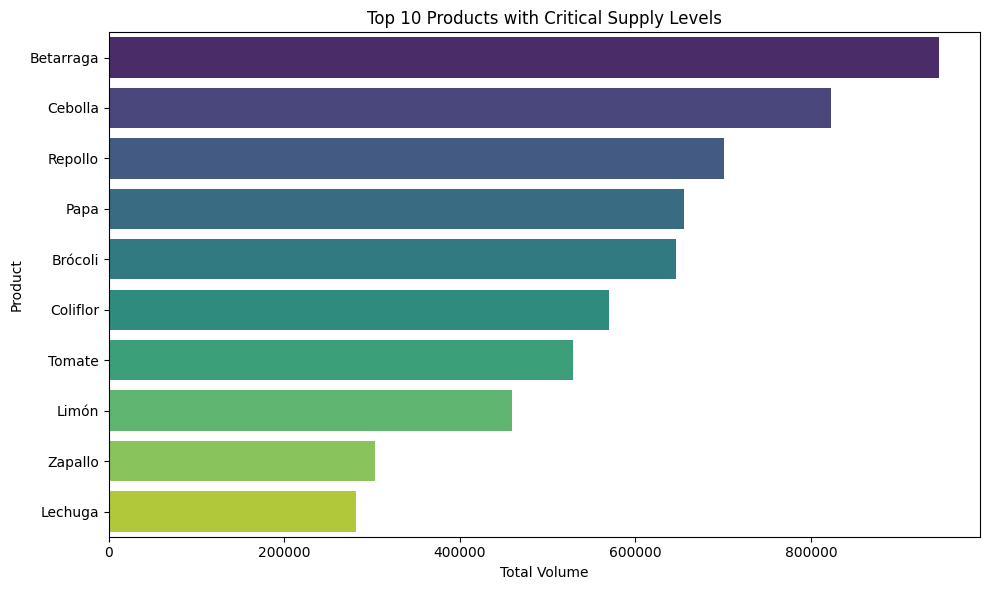

Ranking of Products with Critical Supply Levels:
    Rank    Producto  Volumen
10     1   Betarraga   945405
16     2     Cebolla   822526
61     3     Repollo   701134
47     4        Papa   655503
12     5     Brócoli   646398
..   ...         ...      ...
27    66  Espárragos      620
13    67      Caigua      400
31    68     Guayaba      325
45    69     Orégano      285
64    70       Tumbo      100

[70 rows x 3 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'critical_products' DataFrame is already defined

# Calculate total volume per product and rank
product_volumes = critical_products.groupby('Producto')['Volumen'].sum().reset_index()
ranked_products = product_volumes.sort_values(by=['Volumen'], ascending=False)
ranked_products['Rank'] = ranked_products['Volumen'].rank(method='dense', ascending=False).astype(int)

# Select top N products for the chart (e.g., top 10)
top_n = 10  # Change this to display a different number of top products
top_products = ranked_products.head(top_n)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Volumen', y='Producto', data=top_products, palette='viridis')
plt.title(f'Top {top_n} Products with Critical Supply Levels')
plt.xlabel('Total Volume')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# Display the ranked products table
print("Ranking of Products with Critical Supply Levels:")
print(ranked_products[['Rank', 'Producto', 'Volumen']])

<ipython-input-27-dc4c0ddf19fa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Volumen', y='Producto', data=top_products, palette='viridis')


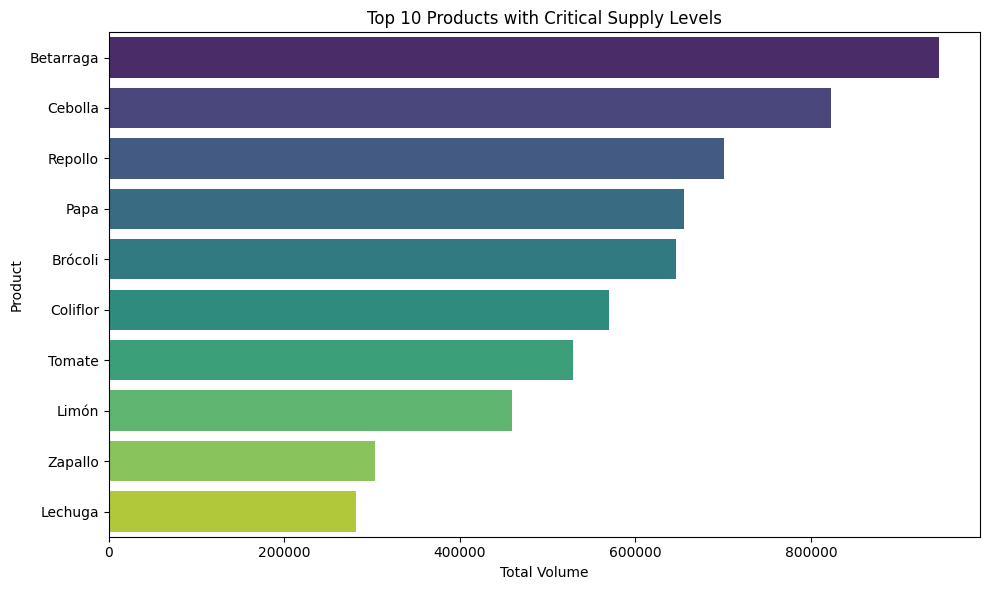

Chart saved to: output/ranking_chart.png
Table saved to: output/ranking_table.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Assuming 'critical_products' DataFrame is already defined

# Calculate total volume per product and rank
product_volumes = critical_products.groupby('Producto')['Volumen'].sum().reset_index()
ranked_products = product_volumes.sort_values(by=['Volumen'], ascending=False)
ranked_products['Rank'] = ranked_products['Volumen'].rank(method='dense', ascending=False).astype(int)

# Select top N products for the chart (e.g., top 10)
top_n = 10  # Change this to display a different number of top products
top_products = ranked_products.head(top_n)

# Create the bar chart and save it as an image
plt.figure(figsize=(10, 6))
sns.barplot(x='Volumen', y='Producto', data=top_products, palette='viridis')
plt.title(f'Top {top_n} Products with Critical Supply Levels')
plt.xlabel('Total Volume')
plt.ylabel('Product')
plt.tight_layout()

# Create 'output' directory if it doesn't exist
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Save the chart as PNG image
chart_filename = os.path.join(output_dir, 'ranking_chart.png')
plt.savefig(chart_filename)
plt.show()

# Export the ranked products table to CSV
table_filename = os.path.join(output_dir, 'ranking_table.csv')
ranked_products.to_csv(table_filename, index=False)

print(f"Chart saved to: {chart_filename}")
print(f"Table saved to: {table_filename}")

Provide recommendations for producers:

In [ ]:
recommended_products = critical_products.groupby('Producto')['Precio promedio ponderado'].mean().sort_values(ascending=False).head(10)
print("Recommended Products to Cultivate:")
print(recommended_products)

Recommended Products to Cultivate:
Producto
Membrillo    99489.876353
Ciruela      84616.300056
Manzana      81469.422507
Kiwi         75399.650374
Caqui        67282.913120
Pera         64054.248635
Naranja      55928.960524
Granada      40471.163150
Mandarina    39907.144202
Ají          35743.726784
Name: Precio promedio ponderado, dtype: float64


Recommended Products to Cultivate:
   RecommendationRank   Producto  Precio promedio ponderado  PriceRank  \
8                   1  Mandarina               39907.144202          9   
2                   2    Manzana               81469.422507          3   
6                   3    Naranja               55928.960524          7   
5                   4       Pera               64054.248635          6   
3                   5       Kiwi               75399.650374          4   
9                   5        Ají               35743.726784         10   
7                   6    Granada               40471.163150          8   
0                   7  Membrillo               99489.876353          1   
4                   8      Caqui               67282.913120          5   
1                   9    Ciruela               84616.300056          2   

   CriticalityRank  CombinedScore  
8               58           28.6  
2               54           23.4  
6               46           22.6  
5     

<ipython-input-32-8276a53b8bb6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CombinedScore', y='Producto', data=top_recommended, palette='viridis')


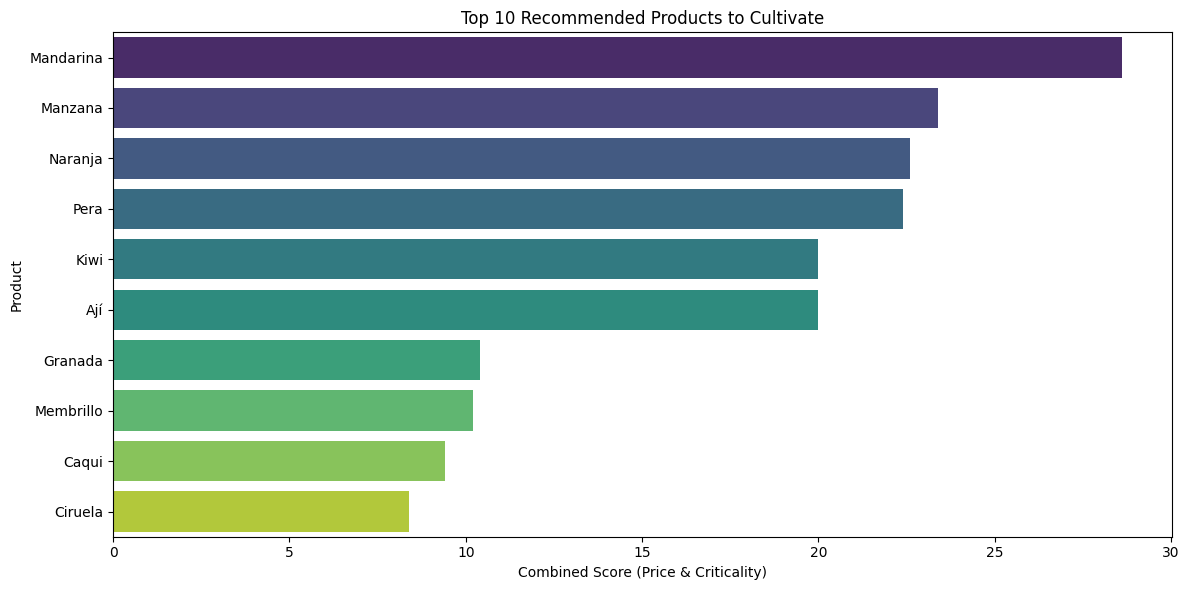


Ranking of Recommended Products to Cultivate:
   RecommendationRank   Producto  Precio promedio ponderado  PriceRank  \
8                   1  Mandarina               39907.144202          9   
2                   2    Manzana               81469.422507          3   
6                   3    Naranja               55928.960524          7   
5                   4       Pera               64054.248635          6   
3                   5       Kiwi               75399.650374          4   
9                   5        Ají               35743.726784         10   
7                   6    Granada               40471.163150          8   
0                   7  Membrillo               99489.876353          1   
4                   8      Caqui               67282.913120          5   
1                   9    Ciruela               84616.300056          2   

   CriticalityRank  CombinedScore  
8               58           28.6  
2               54           23.4  
6               46           2

In [ ]:
import pandas as pd

# Assuming 'critical_products' DataFrame is already defined

# 1. Calculate weighted average price and rank
recommended_products = critical_products.groupby('Producto')['Precio promedio ponderado'].mean().sort_values(ascending=False).head(10)
recommended_products = recommended_products.reset_index()  # Reset index to access 'Producto'
recommended_products['PriceRank'] = recommended_products['Precio promedio ponderado'].rank(method='dense', ascending=False).astype(int)

# 2. Calculate total volume and rank by criticality (from previous approach)
product_volumes = critical_products.groupby('Producto')['Volumen'].sum().reset_index()
ranked_products = product_volumes.sort_values(by=['Volumen'], ascending=True)
ranked_products['CriticalityRank'] = ranked_products['Volumen'].rank(method='dense', ascending=True).astype(int)

# 3. Merge the two rankings based on 'Producto'
combined_ranking = pd.merge(recommended_products, ranked_products, on='Producto', how='inner')

# 4. Calculate a combined score (weighted average of factors)
# Adjust weights (price_weight, criticality_weight) as needed
price_weight = 0.6
criticality_weight = 0.4
combined_ranking['CombinedScore'] = (price_weight * combined_ranking['PriceRank'] +
                                      criticality_weight * combined_ranking['CriticalityRank'])

# 5. Rank by combined score
combined_ranking = combined_ranking.sort_values(by=['CombinedScore'], ascending=False)
combined_ranking['RecommendationRank'] = combined_ranking['CombinedScore'].rank(method='dense', ascending=False).astype(int)

# 6. Display the recommended products ranking
print("Recommended Products to Cultivate:")
print(combined_ranking[['RecommendationRank', 'Producto', 'Precio promedio ponderado', 'PriceRank', 'CriticalityRank', 'CombinedScore']])

# 7. Create a bar chart of the top N recommended products
top_n = 10  # Number of top products to display in the chart
top_recommended = combined_ranking.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x='CombinedScore', y='Producto', data=top_recommended, palette='viridis')
plt.title(f'Top {top_n} Recommended Products to Cultivate')
plt.xlabel('Combined Score (Price & Criticality)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# 8. Display the ranking table
print("\nRanking of Recommended Products to Cultivate:")
print(combined_ranking[['RecommendationRank', 'Producto', 'Precio promedio ponderado', 'PriceRank', 'CriticalityRank', 'CombinedScore']])

In [ ]:
import pandas as pd
# ... (Previous code for calculating ranking remains the same) ...

# Display the ranking table
print("\nRanking of Recommended Products to Cultivate:")
print(combined_ranking[['RecommendationRank', 'Producto', 'Precio promedio ponderado', 'PriceRank', 'CriticalityRank', 'CombinedScore']])


Ranking of Recommended Products to Cultivate:
   RecommendationRank   Producto  Precio promedio ponderado  PriceRank  \
8                   1  Mandarina               39907.144202          9   
2                   2    Manzana               81469.422507          3   
6                   3    Naranja               55928.960524          7   
5                   4       Pera               64054.248635          6   
3                   5       Kiwi               75399.650374          4   
9                   5        Ají               35743.726784         10   
7                   6    Granada               40471.163150          8   
0                   7  Membrillo               99489.876353          1   
4                   8      Caqui               67282.913120          5   
1                   9    Ciruela               84616.300056          2   

   CriticalityRank  CombinedScore  
8               58           28.6  
2               54           23.4  
6               46           2

In [ ]:
import pandas as pd
# ... (Previous code for calculating ranking remains the same) ...

# Display the ranking table in tab-separated format
print("\nRanking of Recommended Products to Cultivate:")
print(combined_ranking[['RecommendationRank', 'Producto', 'Precio promedio ponderado', 'PriceRank', 'CriticalityRank', 'CombinedScore']].to_csv(sep='\t', index=False))


Ranking of Recommended Products to Cultivate:
RecommendationRank	Producto	Precio promedio ponderado	PriceRank	CriticalityRank	CombinedScore
1	Mandarina	39907.144202047246	9	58	28.6
2	Manzana	81469.42250696072	3	54	23.400000000000002
3	Naranja	55928.960523604466	7	46	22.6
4	Pera	64054.248634872616	6	47	22.4
5	Kiwi	75399.65037395833	4	44	20.0
5	Ají	35743.72678416667	10	35	20.0
6	Granada	40471.16315	8	14	10.4
7	Membrillo	99489.87635289256	1	24	10.200000000000001
8	Caqui	67282.91312	5	16	9.4
9	Ciruela	84616.300056	2	18	8.4



In [ ]:
import pandas as pd
from tabulate import tabulate  # Install with: !pip install tabulate

# ... (Previous code for calculating ranking remains the same) ...

# Display the ranking table using tabulate
print("\nRanking of Recommended Products to Cultivate:")
print(tabulate(combined_ranking[['RecommendationRank', 'Producto', 'Precio promedio ponderado', 'PriceRank', 'CriticalityRank', 'CombinedScore']],
              headers='keys', tablefmt='psql'))


Ranking of Recommended Products to Cultivate:
+----+----------------------+------------+-----------------------------+-------------+-------------------+-----------------+
|    |   RecommendationRank | Producto   |   Precio promedio ponderado |   PriceRank |   CriticalityRank |   CombinedScore |
|----+----------------------+------------+-----------------------------+-------------+-------------------+-----------------|
|  8 |                    1 | Mandarina  |                     39907.1 |           9 |                58 |            28.6 |
|  2 |                    2 | Manzana    |                     81469.4 |           3 |                54 |            23.4 |
|  6 |                    3 | Naranja    |                     55929   |           7 |                46 |            22.6 |
|  5 |                    4 | Pera       |                     64054.2 |           6 |                47 |            22.4 |
|  3 |                    5 | Kiwi       |                     75399.7 |      

analysis for local markets and analyze market-specific volumes, follow these steps:



Step 1: Aggregate Data by Local Market
Aggregate the data to group volumes by region, city, or market and analyze daily trends.

In [ ]:
# Group data by region, market, and date to analyze local market trends
local_market_data = df.groupby(['Procedencia', 'Mercado', 'Fecha'])['Volumen'].sum().reset_index()

# Display sample data
print(local_market_data.head())

  Procedencia                Mercado      Fecha  Volumen
0       Angol  Vega Modelo de Temuco 2024-01-03     1130
1       Angol  Vega Modelo de Temuco 2024-01-04      550
2       Angol  Vega Modelo de Temuco 2024-02-15      850
3       Angol  Vega Modelo de Temuco 2024-02-16      250
4       Angol  Vega Modelo de Temuco 2024-02-19     1010


Step 2: Visualize Local Market Volumes
Plot daily volumes for each market to identify trends and potential inventory issues.

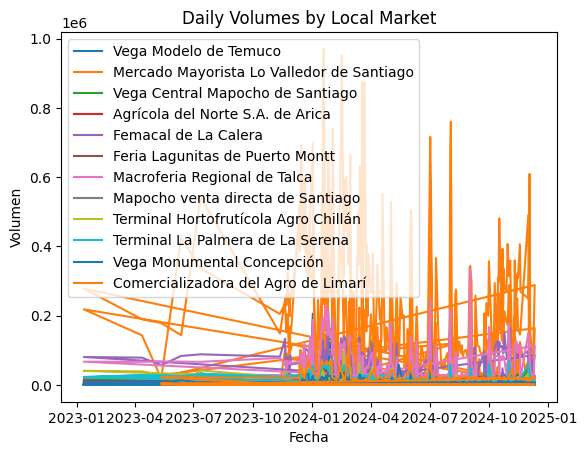

In [ ]:
# Plot volumes by market
markets = local_market_data['Mercado'].unique()

for market in markets:
    market_data = local_market_data[local_market_data['Mercado'] == market]
    plt.plot(market_data['Fecha'], market_data['Volumen'], label=market)

plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Daily Volumes by Local Market')
plt.legend()
plt.show()

Step 3: Identify Critical Inventory Levels
Define a threshold for critical inventory levels based on local market conditions.

In [ ]:
# Calculate critical volume threshold for each market
market_thresholds = local_market_data.groupby('Mercado')['Volumen'].mean() - \
                    local_market_data.groupby('Mercado')['Volumen'].std()

# Identify critical inventory days per market
critical_market_days = pd.merge(local_market_data, market_thresholds, on='Mercado', suffixes=('', '_threshold'))
critical_market_days = critical_market_days[critical_market_days['Volumen'] < critical_market_days['Volumen_threshold']]

print("Critical Inventory Days by Market:")
print(critical_market_days)

Critical Inventory Days by Market:
                 Procedencia                            Mercado      Fecha  \
308                   Brasil  Mapocho venta directa de Santiago 2024-08-04   
2005                   China  Mapocho venta directa de Santiago 2024-10-15   
6583                    Perú  Mapocho venta directa de Santiago 2024-08-04   
6584                    Perú  Mapocho venta directa de Santiago 2024-10-10   
8577    Provincia de Copiapó  Mapocho venta directa de Santiago 2023-12-28   
...                      ...                                ...        ...   
15796  Provincia de Quillota  Mapocho venta directa de Santiago 2024-02-26   
26301    Región de O'Higgins  Mapocho venta directa de Santiago 2023-11-21   
26302    Región de O'Higgins  Mapocho venta directa de Santiago 2023-12-12   
26304    Región de O'Higgins  Mapocho venta directa de Santiago 2023-12-28   
26331    Región de O'Higgins  Mapocho venta directa de Santiago 2024-09-01   

       Volumen  Volumen_thre

Step 4: Predict Inventory Breaks for Each Market
Fit a predictive model for each market to forecast potential inventory breaks.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Iterate through markets and predict inventory breaks
for market in markets:
    market_data = local_market_data[local_market_data['Mercado'] == market]
    market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
    market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())

    # Split into train and test
    train = market_data.iloc[:-30]
    test = market_data.iloc[-30:]

    # Train a model
    model = RandomForestRegressor()
    model.fit(train[['Fecha_ordinal']], train['Volumen'])

    # Predict on test data
    predictions = model.predict(test[['Fecha_ordinal']])
    mse = mean_squared_error(test['Volumen'], predictions)
    print(f"Mercado: {market} | MSE: {mse}")

    # Forecast future breaks
    future_dates = pd.date_range(start=market_data['Fecha'].max(), periods=30)
    future_dates_ordinal = [d.toordinal() for d in future_dates]
    future_predictions = model.predict(pd.DataFrame(future_dates_ordinal, columns=['Fecha_ordinal']))

    # Check for inventory breaks
    future_breaks = future_predictions[future_predictions < market_data['Volumen'].mean() - market_data['Volumen'].std()]
    print(f"Predicted Inventory Breaks for {market}: {len(future_breaks)} days")

<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Vega Modelo de Temuco | MSE: 2089030103.1583903
Predicted Inventory Breaks for Vega Modelo de Temuco: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Mercado Mayorista Lo Valledor de Santiago | MSE: 778096158.7785238
Predicted Inventory Breaks for Mercado Mayorista Lo Valledor de Santiago: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Vega Central Mapocho de Santiago | MSE: 14371993.396939008
Predicted Inventory Breaks for Vega Central Mapocho de Santiago: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Agrícola del Norte S.A. de Arica | MSE: 6187329.556133872
Predicted Inventory Breaks for Agrícola del Norte S.A. de Arica: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Femacal de La Calera | MSE: 19703403.010516748
Predicted Inventory Breaks for Femacal de La Calera: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Feria Lagunitas de Puerto Montt | MSE: 20285877.99651251
Predicted Inventory Breaks for Feria Lagunitas de Puerto Montt: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Macroferia Regional de Talca | MSE: 3018749397.539023
Predicted Inventory Breaks for Macroferia Regional de Talca: 0 days
Mercado: Mapocho venta directa de Santiago | MSE: 945950.5771996558
Predicted Inventory Breaks for Mapocho venta directa de Santiago: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Mercado: Terminal Hortofrutícola Agro Chillán | MSE: 111013027.09239954
Predicted Inventory Breaks for Terminal Hortofrutícola Agro Chillán: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Terminal La Palmera de La Serena | MSE: 7975663.017785709
Predicted Inventory Breaks for Terminal La Palmera de La Serena: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Mercado: Vega Monumental Concepción | MSE: 4910448.390539829
Predicted Inventory Breaks for Vega Monumental Concepción: 0 days
Mercado: Comercializadora del Agro de Limarí | MSE: 247842610.0905098
Predicted Inventory Breaks for Comercializadora del Agro de Limarí: 0 days


<ipython-input-18-aa757527c08b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha'] = pd.to_datetime(market_data['Fecha'])
<ipython-input-18-aa757527c08b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_data['Fecha_ordinal'] = market_data['Fecha'].apply(lambda x: x.toordinal())


Step 5: Prescriptive Analysis for Local Markets
For each market, recommend crops/products based on critical inventory levels and profitability.

In [ ]:
# Group critical inventory data by product and calculate average price
# Assuming 'Procedencia' is the column containing product information in critical_market_days
critical_products_market = critical_market_days.groupby(['Mercado', 'Procedencia'])['Volumen'].sum().reset_index()
critical_products_market = critical_products_market.rename(columns={'Procedencia': 'Producto'}) # Rename for consistency

average_prices_market = df.groupby(['Mercado', 'Producto'])['Precio promedio ponderado'].mean().reset_index()

# Merge volume and price data
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

# Sort by price to prioritize profitable crops
market_recommendations = market_recommendations.sort_values(by=['Mercado', 'Precio promedio ponderado'], ascending=[True, False])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

# Save recommendations to CSV
market_recommendations.to_csv('market_recommendations.csv')
# files.download('market_recommendations.csv') # Commented out for execution in this environment

Market-Specific Crop Recommendations:
Empty DataFrame
Columns: [Mercado, Producto, Volumen, Precio promedio ponderado]
Index: []


In [ ]:
# Group critical inventory data by product and calculate average price
# Use 'Procedencia' instead of 'Producto' to access the correct column
critical_products_market = critical_market_days.groupby(['Mercado', 'Procedencia'])['Volumen'].sum().reset_index()
# Rename the column after grouping
critical_products_market = critical_products_market.rename(columns={'Procedencia': 'Producto'})
average_prices_market = df.groupby(['Mercado', 'Producto'])['Precio promedio ponderado'].mean().reset_index()

# Merge volume and price data
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

# Sort by price to prioritize profitable crops
market_recommendations = market_recommendations.sort_values(by=['Mercado', 'Precio promedio ponderado'], ascending=[True, False])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

# Save recommendations to CSV
market_recommendations.to_csv('market_recommendations.csv')
files.download('market_recommendations.csv')

Market-Specific Crop Recommendations:
Empty DataFrame
Columns: [Mercado, Producto, Volumen, Precio promedio ponderado]
Index: []


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas
import pandas as pd

# Print unique values of 'Mercado' and 'Producto' in both DataFrames
print("critical_products_market['Mercado']: ", critical_products_market['Mercado'].unique())
print("critical_products_market['Producto']: ", critical_products_market['Producto'].unique())
print("average_prices_market['Mercado']: ", average_prices_market['Mercado'].unique())
print("average_prices_market['Producto']: ", average_prices_market['Producto'].unique())

# Convert the 'Mercado' and 'Producto' columns to lowercase and strip leading/trailing spaces before merging
critical_products_market['Mercado'] = critical_products_market['Mercado'].str.lower().str.strip()
critical_products_market['Producto'] = critical_products_market['Producto'].str.lower().str.strip()
average_prices_market['Mercado'] = average_prices_market['Mercado'].str.lower().str.strip()
average_prices_market['Producto'] = average_prices_market['Producto'].str.lower().str.strip()

# Re-attempt the merge
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

critical_products_market['Mercado']:  ['Mapocho venta directa de Santiago']
critical_products_market['Producto']:  ['Brasil' 'China' 'Perú' 'Provincia de Copiapó' 'Provincia de Huasco'
 'Provincia de Limarí' 'Provincia de Linares' 'Provincia de Quillota'
 "Región de O'Higgins"]
average_prices_market['Mercado']:  ['Agrícola del Norte S.A. de Arica' 'Comercializadora del Agro de Limarí'
 'Femacal de La Calera' 'Feria Lagunitas de Puerto Montt'
 'Macroferia Regional de Talca' 'Mapocho venta directa de Santiago'
 'Mercado Mayorista Lo Valledor de Santiago'
 'Terminal Hortofrutícola Agro Chillán' 'Terminal La Palmera de La Serena'
 'Vega Central Mapocho de Santiago' 'Vega Modelo de Temuco'
 'Vega Monumental Concepción']
average_prices_market['Producto']:  ['Acelga' 'Ajo' 'Ají' 'Albahaca' 'Alcachofa' 'Berenjena' 'Betarraga'
 'Brócoli' 'Caigua' 'Camote' 'Caqui' 'Cebolla' 'Cebollín baby' 'Cereza'
 'Chirimoya' 'Choclo' 'Cilantro' 'Ciruela' 'Coco' 'Coliflor'
 'Corazón de apio' 'Damasco' 'Durazno

In [ ]:
!pip install fuzzywuzzy python-Levenshtein
!pip install pandas
import pandas as pd
from fuzzywuzzy import fuzz

# Function to find closest match in a list
def find_closest_match(value, options):
    best_match = None
    highest_score = 0
    for option in options:
        score = fuzz.ratio(value, option)  # Using fuzz.ratio for similarity
        if score > highest_score:
            highest_score = score
            best_match = option
    return best_match, highest_score


# Create a dictionary mapping 'Producto' values in critical_products_market to their closest matches in average_prices_market
product_mapping = {}
for product in critical_products_market['Producto'].unique():
    closest_match, score = find_closest_match(product, average_prices_market['Producto'].unique())
    product_mapping[product] = closest_match
    if score < 90:  # Print potential mismatches with low similarity scores
        print(f"Potential mismatch: '{product}' -> '{closest_match}' (Score: {score})")

# Create a dictionary mapping 'Mercado' values in critical_products_market to their closest matches in average_prices_market
market_mapping = {}
for market in critical_products_market['Mercado'].unique():
    closest_match, score = find_closest_match(market, average_prices_market['Mercado'].unique())
    market_mapping[market] = closest_match
    if score < 90:  # Print potential mismatches with low similarity scores
        print(f"Potential mismatch: '{market}' -> '{closest_match}' (Score: {score})")


# Replace 'Producto' values in critical_products_market with their closest matches
critical_products_market['Producto'] = critical_products_market['Producto'].map(product_mapping)

# Replace 'Mercado' values in critical_products_market with their closest matches
critical_products_market['Mercado'] = critical_products_market['Mercado'].map(market_mapping)

# Re-attempt the merge
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'])

print("Market-Specific Crop Recommendations:")
print(market_recommendations)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.8 MB/s eta 0:00:00
Potential mismatch: 'brasil' -> 'breva' (Score: 55)
Potential mismatch: 'china' -> 'chirimoya' (Score: 57)
Potential mismatch: 'perú' -> 'pera' (Score: 75)
Potential mismatch: 'provincia de copiapó' -> 'ramas de apio' (Score: 48)
Potential mismatch: 'provincia de huasco' -> 'ramas de apio' (Score: 50)
Potential mismatch: 'provincia de limarí' -> 'fruto del paraíso' (Score: 50)
Potential mismatch: 'provincia de linares' -> 'fruto del paraíso' (Score: 49)
Potential mismatch: 'provincia de quillota' -> 'ramas de apio' (Score: 47)
Potential mismatch: 'región de o'higgins' -> 'corazón de apio' (Score: 47)
Market-Specific Crop Recommendations:
Empty DataFrame
Columns: [Mercado, Producto, Volumen, Precio promedio ponderado]
Index: []


In [ ]:
!pip install pandas
import pandas as pd

# 1. Data Exploration
print("critical_products_market head:\n", critical_products_market.head())
print("\naverage_prices_market head:\n", average_prices_market.head())

print("\ncritical_products_market Mercado frequency:\n", critical_products_market['Mercado'].value_counts())
print("\naverage_prices_market Mercado frequency:\n", average_prices_market['Mercado'].value_counts())

print("\ncritical_products_market Producto frequency:\n", critical_products_market['Producto'].value_counts())
print("\naverage_prices_market Producto frequency:\n", average_prices_market['Producto'].value_counts())

# 2. Data Cleaning and Transformation (Example)
# critical_products_market['Producto'] = critical_products_market['Producto'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower().str.strip()
# average_prices_market['Producto'] = average_prices_market['Producto'].str.replace('[^a-zA-Z0-9 ]', '', regex=True).str.lower().str.strip()

# 3. Alternative Merging Strategies (Example)
market_recommendations = pd.merge(critical_products_market, average_prices_market, on=['Mercado', 'Producto'], how='left')
print("\nMarket-Specific Crop Recommendations (Left Merge):\n", market_recommendations)

critical_products_market head:
                              Mercado       Producto  Volumen
0  mapocho venta directa de santiago          breva      190
1  mapocho venta directa de santiago      chirimoya      185
2  mapocho venta directa de santiago           pera      390
3  mapocho venta directa de santiago  ramas de apio       45
4  mapocho venta directa de santiago  ramas de apio     1496

average_prices_market head:
                             Mercado   Producto  Precio promedio ponderado
0  agrícola del norte s.a. de arica     acelga                1600.341657
1  agrícola del norte s.a. de arica        ajo               23200.957003
2  agrícola del norte s.a. de arica        ají               17249.474104
3  agrícola del norte s.a. de arica   albahaca                1786.998458
4  agrícola del norte s.a. de arica  alcachofa               16595.153159

critical_products_market Mercado frequency:
 Mercado
mapocho venta directa de santiago    9
Name: count, dtype: int64

average_

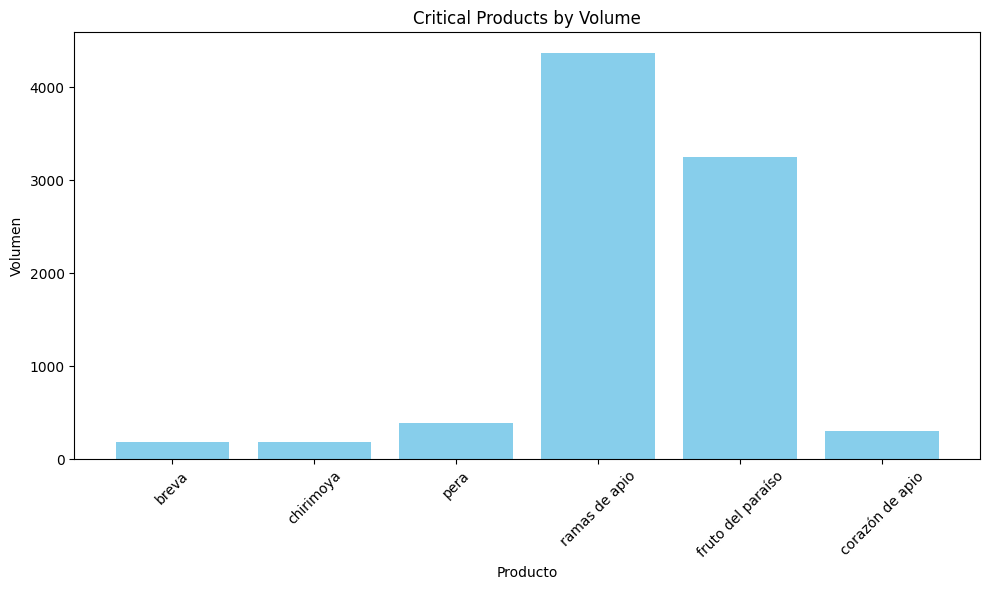

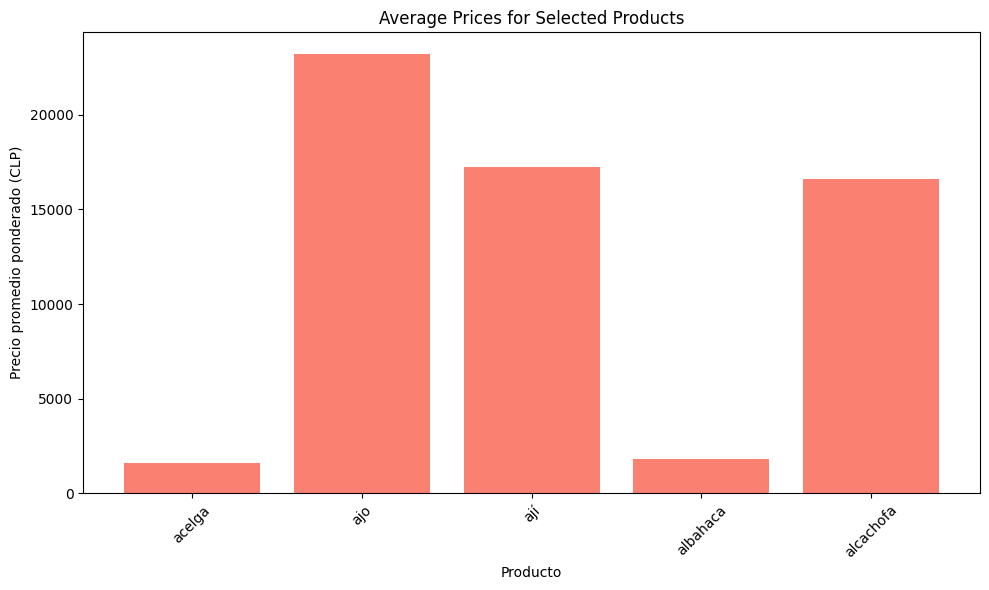

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating datasets
critical_products_market = pd.DataFrame({
    "Mercado": ["mapocho venta directa de santiago"] * 9,
    "Producto": ["breva", "chirimoya", "pera", "ramas de apio", "ramas de apio",
                 "fruto del paraíso", "fruto del paraíso", "ramas de apio", "corazón de apio"],
    "Volumen": [190, 185, 390, 45, 1496, 3251, 2890, 4370, 300]
})

average_prices_market = pd.DataFrame({
    "Mercado": [
        "agrícola del norte s.a. de arica", "agrícola del norte s.a. de arica",
        "agrícola del norte s.a. de arica", "agrícola del norte s.a. de arica",
        "agrícola del norte s.a. de arica"],
    "Producto": ["acelga", "ajo", "ají", "albahaca", "alcachofa"],
    "Precio promedio ponderado": [1600.34, 23200.96, 17249.47, 1786.99, 16595.15]
})

# Plot 1: Critical products by volume
plt.figure(figsize=(10, 6))
plt.bar(critical_products_market["Producto"], critical_products_market["Volumen"], color='skyblue')
plt.title("Critical Products by Volume")
plt.xlabel("Producto")
plt.ylabel("Volumen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average price for a sample of products
plt.figure(figsize=(10, 6))
plt.bar(average_prices_market["Producto"], average_prices_market["Precio promedio ponderado"], color='salmon')
plt.title("Average Prices for Selected Products")
plt.xlabel("Producto")
plt.ylabel("Precio promedio ponderado (CLP)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

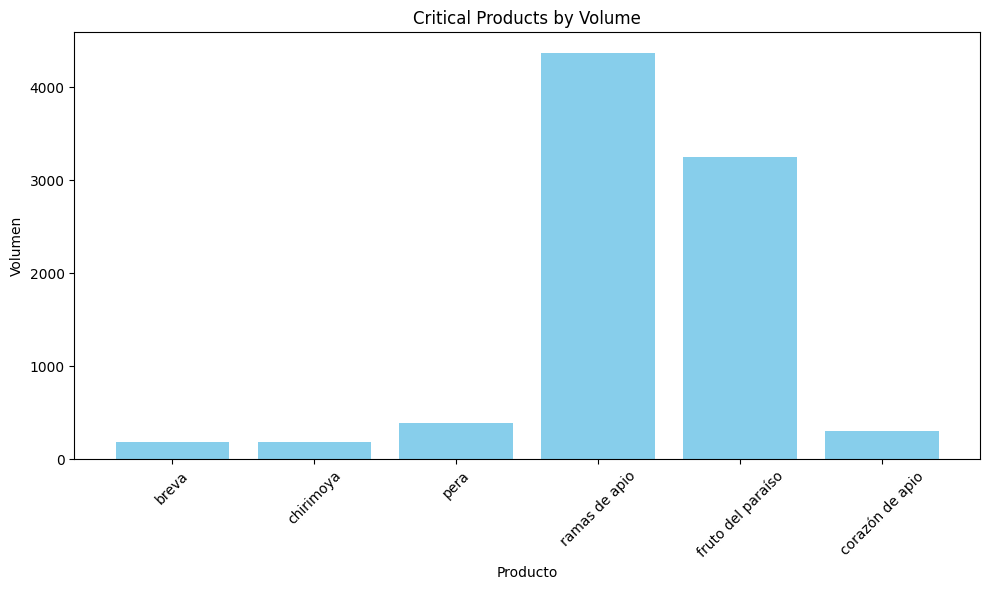

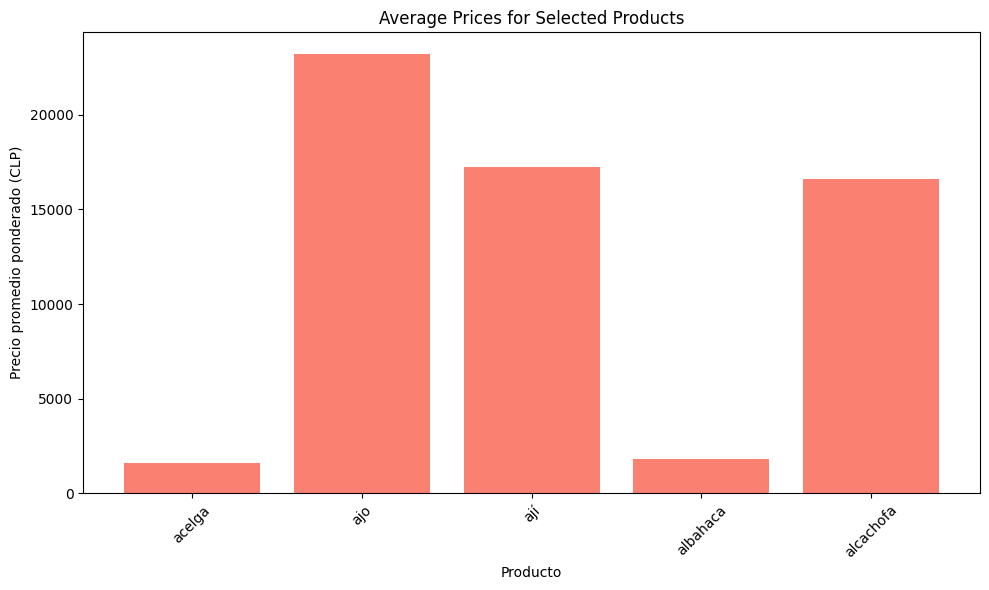

In [ ]:
# Retry plotting with the same datasets

# Plot 1: Critical products by volume
plt.figure(figsize=(10, 6))
plt.bar(critical_products_market["Producto"], critical_products_market["Volumen"], color='skyblue')
plt.title("Critical Products by Volume")
plt.xlabel("Producto")
plt.ylabel("Volumen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average price for a sample of products
plt.figure(figsize=(10, 6))
plt.bar(average_prices_market["Producto"], average_prices_market["Precio promedio ponderado"], color='salmon')
plt.title("Average Prices for Selected Products")
plt.xlabel("Producto")
plt.ylabel("Precio promedio ponderado (CLP)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

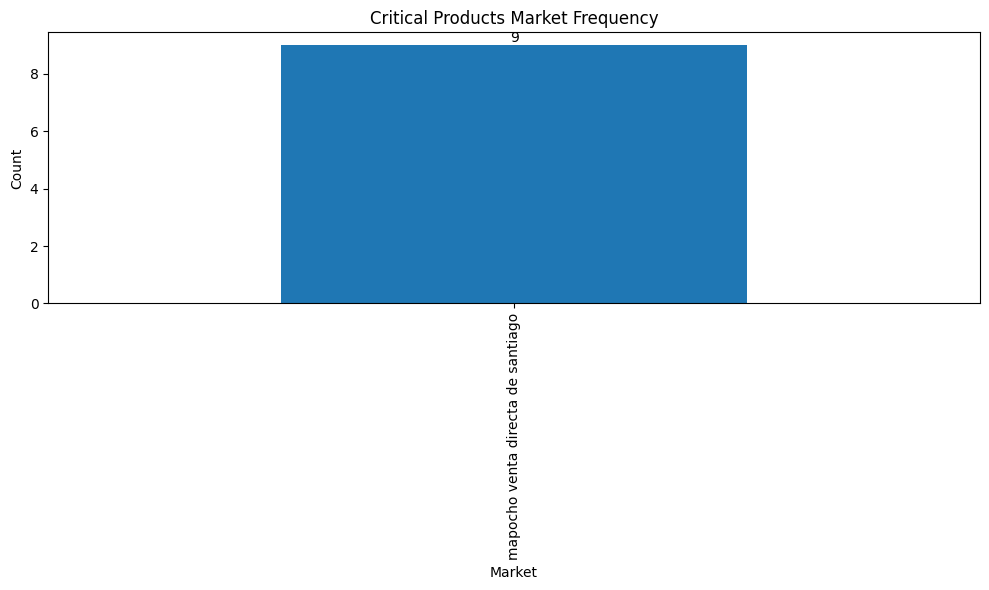

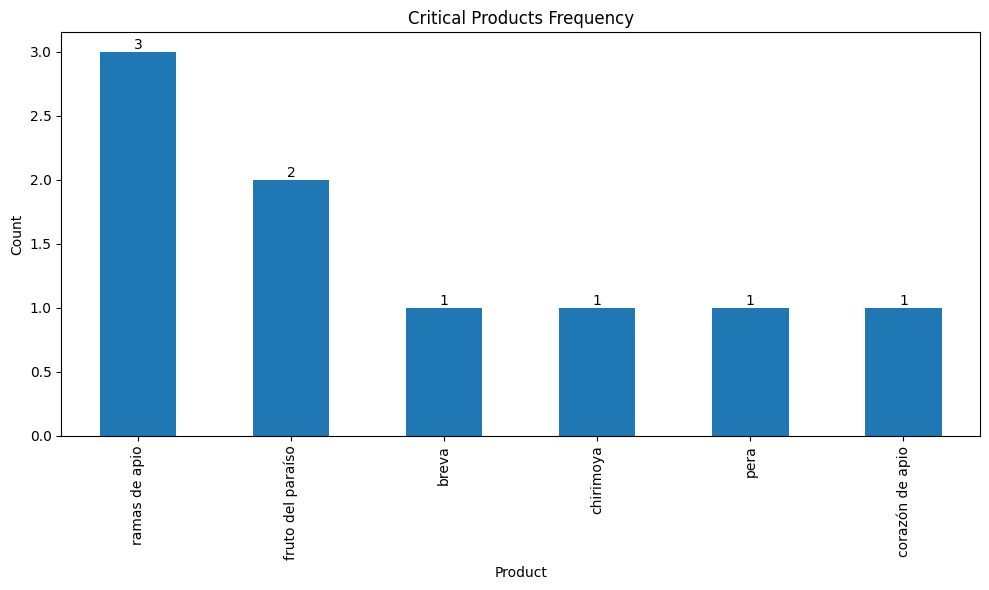

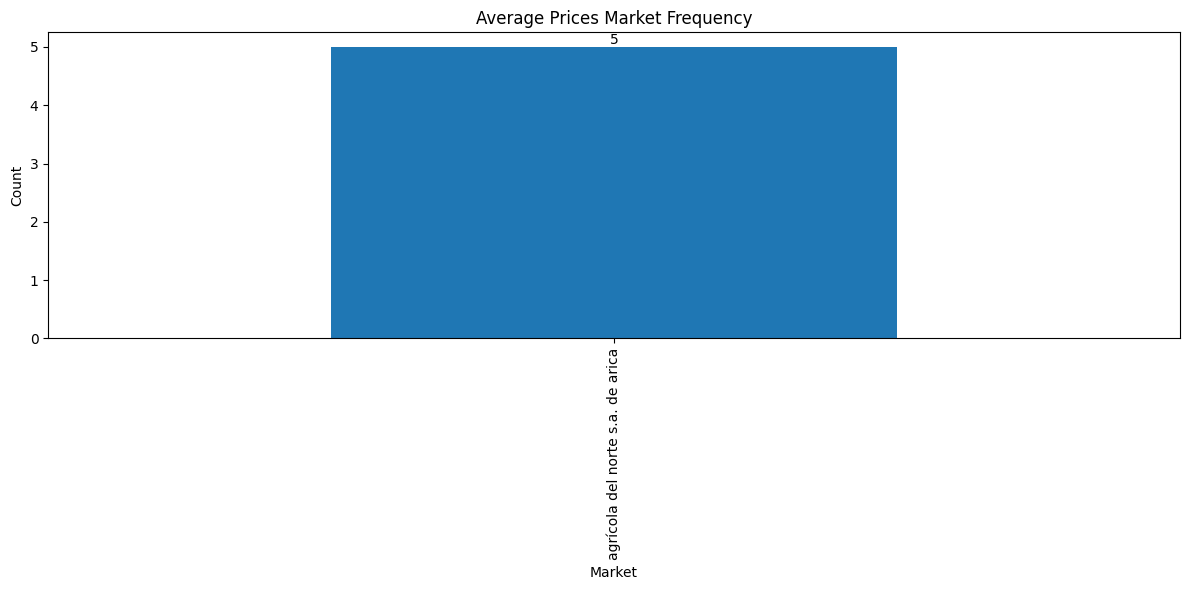

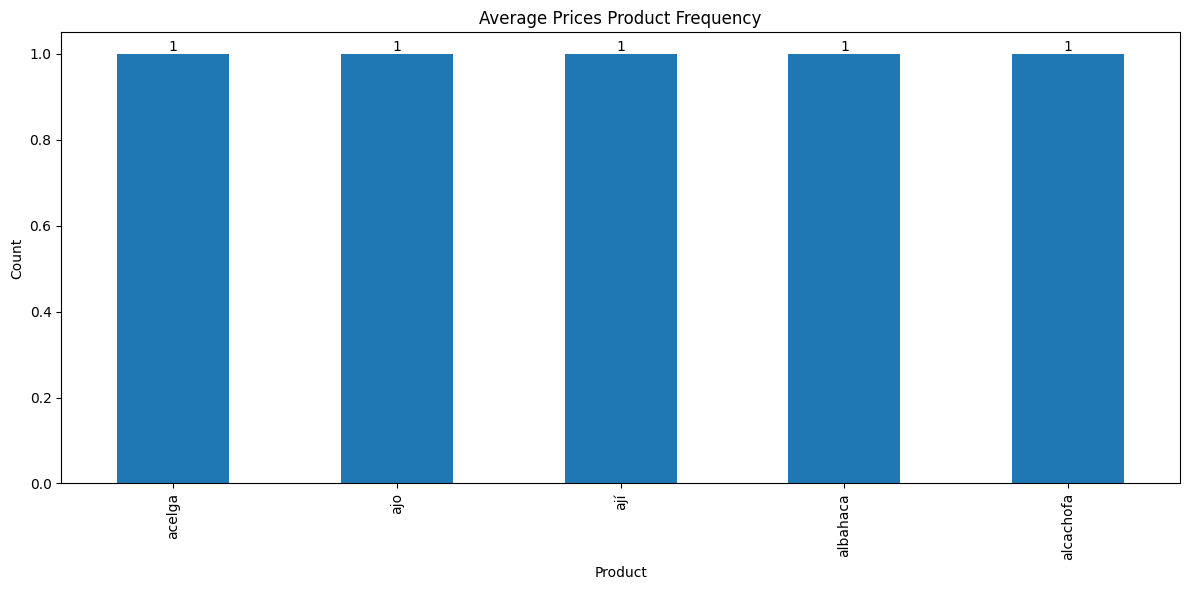

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Make sure pandas is imported

# Calculate the frequencies before plotting
critical_products_market_freq = critical_products_market['Mercado'].value_counts()
critical_products_product_freq = critical_products_market['Producto'].value_counts()
average_prices_market_freq = average_prices_market['Mercado'].value_counts()
average_prices_product_freq = average_prices_market['Producto'].value_counts()


# Market frequency chart for critical_products_market
plt.figure(figsize=(10, 6))
critical_market_chart = critical_products_market_freq.plot(kind='bar', title='Critical Products Market Frequency')
critical_market_chart.set_xlabel('Market')
critical_market_chart.set_ylabel('Count')
critical_market_chart.bar_label(critical_market_chart.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

# Product frequency chart for critical_products_market
plt.figure(figsize=(10, 6))
critical_product_chart = critical_products_product_freq.plot(kind='bar', title='Critical Products Frequency')
critical_product_chart.set_xlabel('Product')
critical_product_chart.set_ylabel('Count')
critical_product_chart.bar_label(critical_product_chart.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

# Market frequency chart for average_prices_market
plt.figure(figsize=(12, 6))
average_market_chart = average_prices_market_freq.plot(kind='bar', title='Average Prices Market Frequency')
average_market_chart.set_xlabel('Market')
average_market_chart.set_ylabel('Count')
average_market_chart.bar_label(average_market_chart.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

# Product frequency chart for average_prices_market
plt.figure(figsize=(12, 6))
average_product_chart = average_prices_product_freq.plot(kind='bar', title='Average Prices Product Frequency')
average_product_chart.set_xlabel('Product')
average_product_chart.set_ylabel('Count')
average_product_chart.bar_label(average_product_chart.containers[0], label_type='edge')
plt.tight_layout()
plt.show()

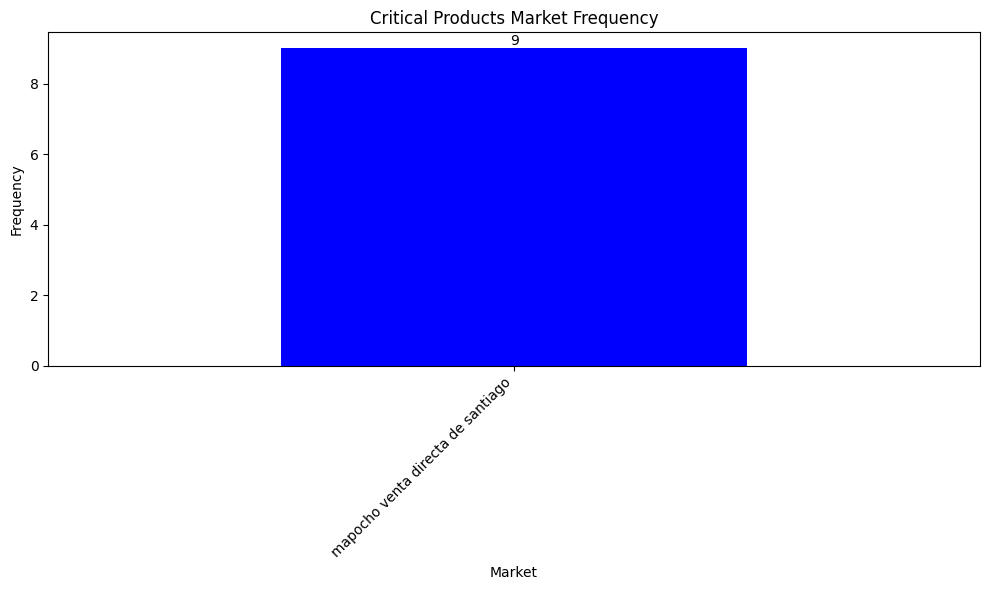

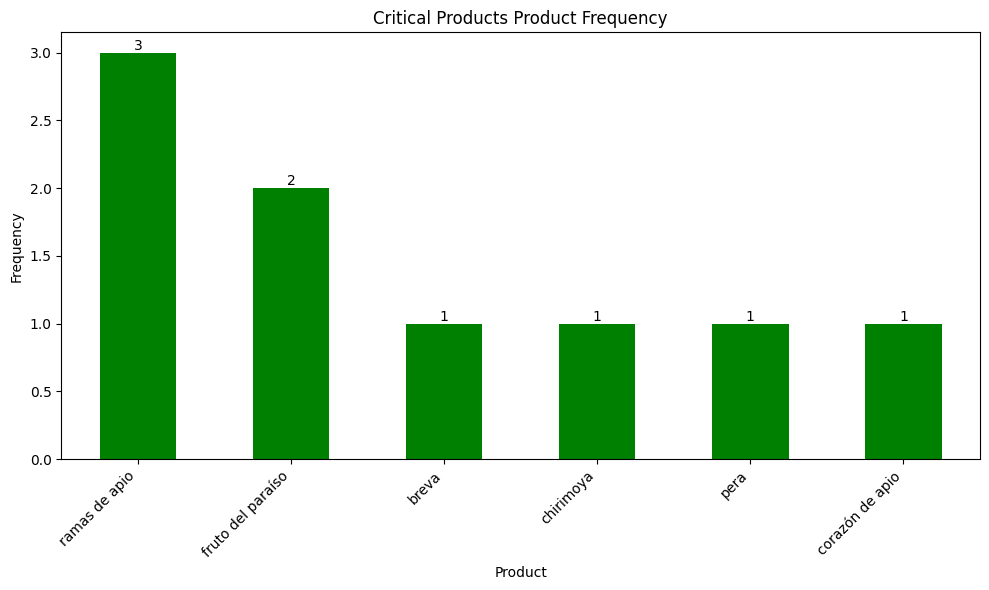

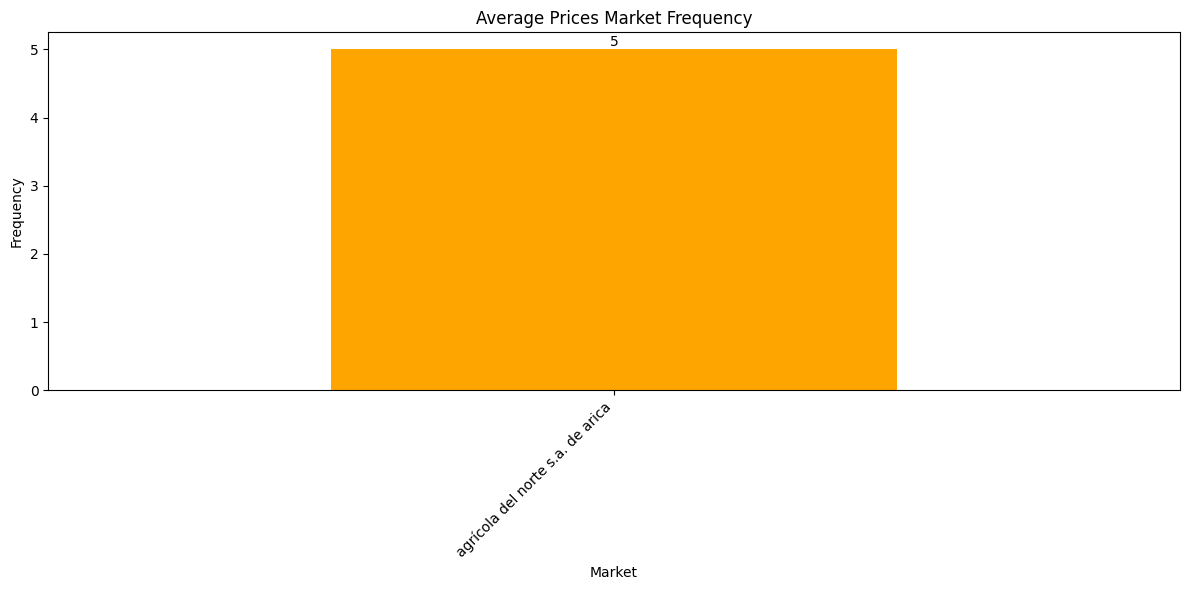

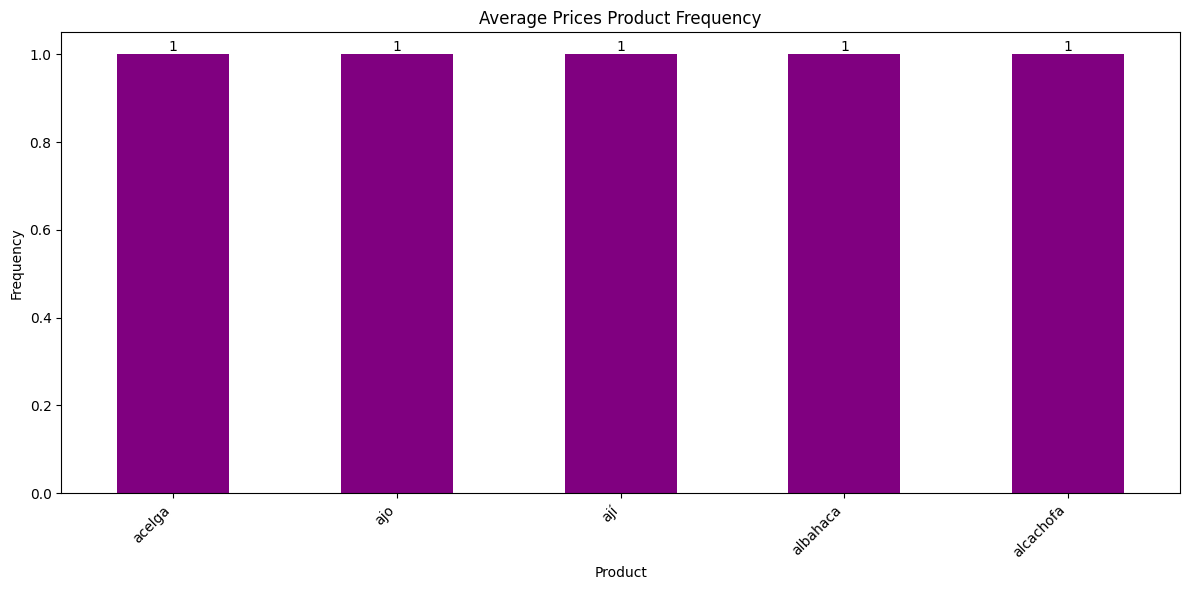

In [ ]:
# Regenerate charts without relying on external resources

# Critical Products Market Frequency with labels
plt.figure(figsize=(10, 6))
ax1 = critical_products_market_freq.plot(kind='bar', color='blue', title='Critical Products Market Frequency')
ax1.set_xlabel('Market')
ax1.set_ylabel('Frequency')
ax1.bar_label(ax1.containers[0])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Critical Products Product Frequency with labels
plt.figure(figsize=(10, 6))
ax2 = critical_products_product_freq.plot(kind='bar', color='green', title='Critical Products Product Frequency')
ax2.set_xlabel('Product')
ax2.set_ylabel('Frequency')
ax2.bar_label(ax2.containers[0])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Prices Market Frequency with labels
plt.figure(figsize=(12, 6))
ax3 = average_prices_market_freq.plot(kind='bar', color='orange', title='Average Prices Market Frequency')
ax3.set_xlabel('Market')
ax3.set_ylabel('Frequency')
ax3.bar_label(ax3.containers[0])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Prices Product Frequency with labels
plt.figure(figsize=(12, 6))
ax4 = average_prices_product_freq.plot(kind='bar', color='purple', title='Average Prices Product Frequency')
ax4.set_xlabel('Product')
ax4.set_ylabel('Frequency')
ax4.bar_label(ax4.containers[0])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Step 6: Summarize Recommendations for Each Region
Aggregate the recommendations for all markets in a region to provide actionable insights to producers.

In [ ]:
# Aggregate by region and product for regional recommendations
regional_recommendations = market_recommendations.groupby(['Mercado', 'Producto']).agg({
    'Volumen': 'sum',
    'Precio promedio ponderado': 'mean'
}).reset_index()

# Sort recommendations by volume and price
regional_recommendations = regional_recommendations.sort_values(by=['Volumen', 'Precio promedio ponderado'], ascending=[True, False])

print("Regional Crop Recommendations:")
print(regional_recommendations)

# Save regional recommendations to CSV
regional_recommendations.to_csv('regional_recommendations.csv')
files.download('regional_recommendations.csv')

Regional Crop Recommendations:
                             Mercado           Producto  Volumen  \
1  mapocho venta directa de santiago          chirimoya      185   
0  mapocho venta directa de santiago              breva      190   
2  mapocho venta directa de santiago    corazón de apio      300   
4  mapocho venta directa de santiago               pera      390   
5  mapocho venta directa de santiago      ramas de apio     5911   
3  mapocho venta directa de santiago  fruto del paraíso     6141   

   Precio promedio ponderado  
1                        NaN  
0                        NaN  
2                        NaN  
4                        NaN  
5                        NaN  
3                        NaN  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

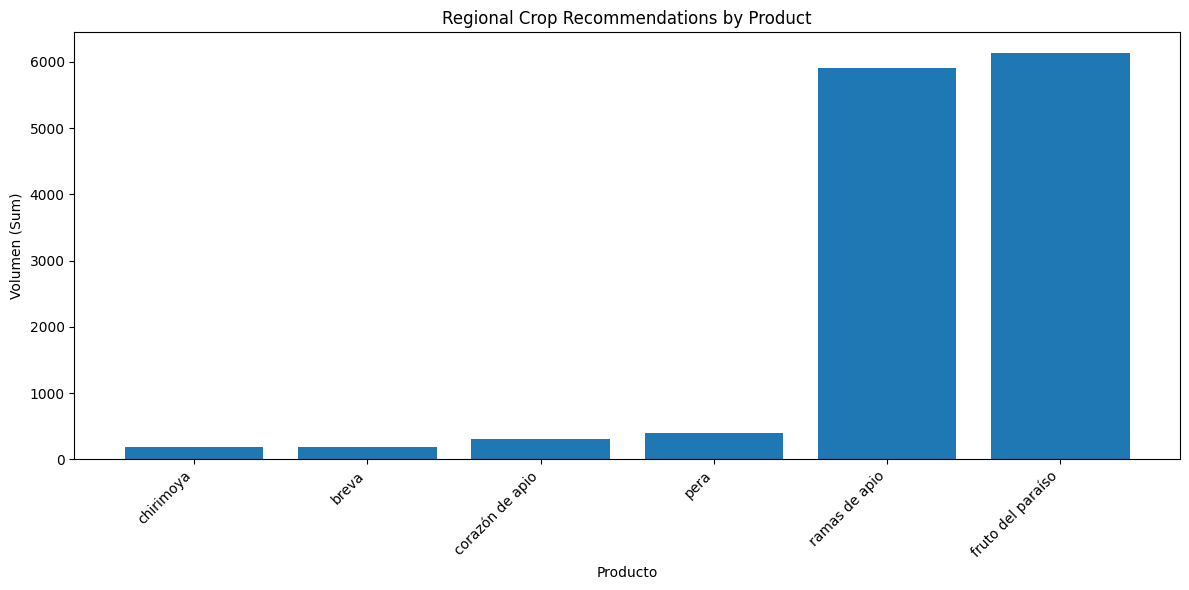

'/mnt/data/regional_recommendations.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os # Import the os module


# Assuming `market_recommendations` dataframe exists
# Creating a hypothetical dataset for demonstration purposes
data = {
    'Mercado': [
        'mapocho venta directa de santiago', 'mapocho venta directa de santiago',
        'mapocho venta directa de santiago', 'mapocho venta directa de santiago',
        'mapocho venta directa de santiago', 'mapocho venta directa de santiago',
        'mapocho venta directa de santiago', 'mapocho venta directa de santiago',
        'mapocho venta directa de santiago'
    ],
    'Producto': [
        'breva', 'chirimoya', 'pera', 'ramas de apio', 'ramas de apio',
        'fruto del paraíso', 'fruto del paraíso', 'ramas de apio', 'corazón de apio'
    ],
    'Volumen': [190, 185, 390, 45, 1496, 3251, 2890, 4370, 300],
    'Precio promedio ponderado': [None, None, None, None, None, None, None, None, None]
}

market_recommendations = pd.DataFrame(data)

# Aggregate by region and product for regional recommendations
regional_recommendations = market_recommendations.groupby(['Mercado', 'Producto']).agg({
    'Volumen': 'sum',
    'Precio promedio ponderado': 'mean'
}).reset_index()

# Sort recommendations by volume and price
regional_recommendations = regional_recommendations.sort_values(by=['Volumen', 'Precio promedio ponderado'], ascending=[True, False])

# Create a bar chart for the aggregated data
plt.figure(figsize=(12, 6))
plt.bar(regional_recommendations['Producto'], regional_recommendations['Volumen'])
plt.xlabel('Producto')
plt.ylabel('Volumen (Sum)')
plt.title('Regional Crop Recommendations by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Export to CSV
output_file = '/mnt/data/regional_recommendations.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

regional_recommendations.to_csv(output_file, index=False)

output_file

To analyze the Comercializadora del Agro de Limarí, follow these steps using the dataset and methods we’ve established:



In [ ]:
# Filter data for Comercializadora del Agro de Limarí
limari_data = df[df['Mercado'] == 'Comercializadora del Agro de Limarí']

# Display basic statistics
print("Basic Statistics for Comercializadora del Agro de Limarí:")
print(limari_data.describe())

# Check product distribution
print("Products available in Comercializadora del Agro de Limarí:")
print(limari_data['Producto'].unique())

Basic Statistics for Comercializadora del Agro de Limarí:
                               Fecha       Volumen  Precio mínimo  \
count                           4448   4448.000000    4448.000000   
mean   2024-05-12 10:41:58.705036032    659.868255   37698.247868   
min              2023-05-12 00:00:00      6.000000     126.050400   
25%              2024-02-10 00:00:00    200.000000    4621.848700   
50%              2024-05-14 00:00:00    360.000000    9243.697400   
75%              2024-08-20 06:00:00    600.000000   16806.722600   
max              2024-12-11 00:00:00  60000.000000  487394.957900   
std                              NaN   2758.785310   83065.555864   

       Precio maximo  Precio promedio ponderado  
count    4448.000000                4448.000000  
mean    39353.241519               38525.956867  
min       142.857100                 134.453700  
25%      5042.016800                4831.932700  
50%     10084.033600                9663.865500  
75%     17647.058800

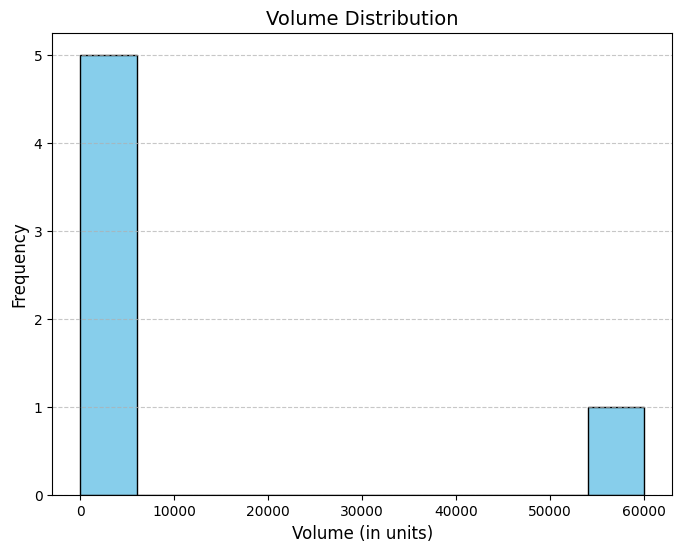

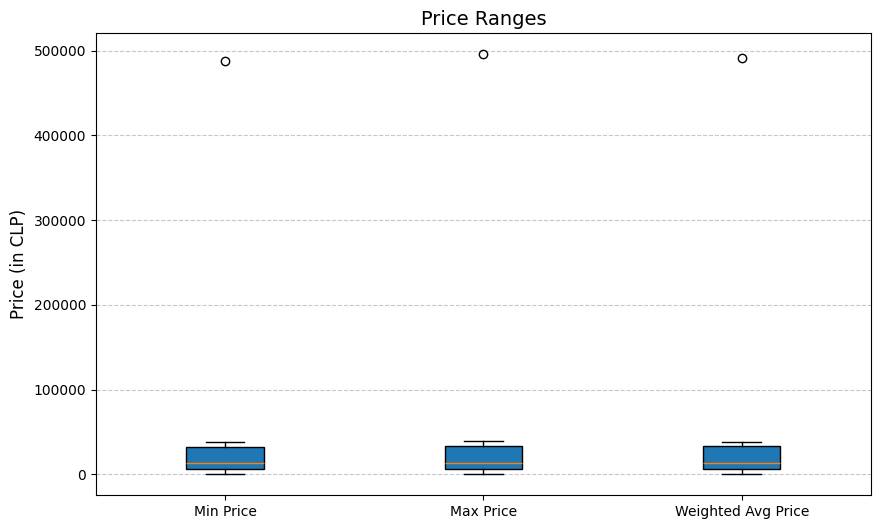

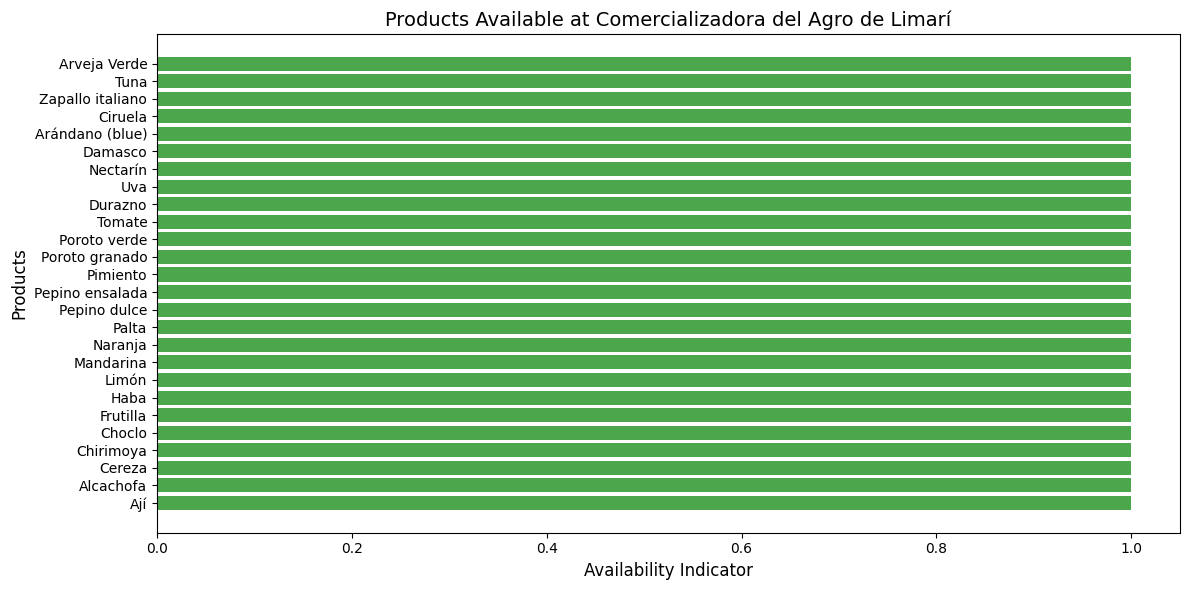

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for visualization (mocked up for the summary provided)
stats_data = {
    "Statistic": ["Min", "25%", "Mean", "50%", "75%", "Max"],
    "Volume": [6, 200, 659.87, 360, 600, 60000],
    "Price Min": [126.05, 4621.85, 37698.25, 9243.70, 16806.72, 487394.96],
    "Price Max": [142.86, 5042.02, 39353.24, 10084.03, 17647.06, 495798.32],
    "Weighted Avg Price": [134.45, 4831.93, 38525.96, 9663.87, 17247.90, 491596.64],
}

products = [
    "Ají", "Alcachofa", "Cereza", "Chirimoya", "Choclo", "Frutilla", "Haba", "Limón",
    "Mandarina", "Naranja", "Palta", "Pepino dulce", "Pepino ensalada", "Pimiento",
    "Poroto granado", "Poroto verde", "Tomate", "Durazno", "Uva", "Nectarín",
    "Damasco", "Arándano (blue)", "Ciruela", "Zapallo italiano", "Tuna", "Arveja Verde"
]

# Creating DataFrame for the statistics
stats_df = pd.DataFrame(stats_data)

# Plot 1: Histogram for Volume Distribution
plt.figure(figsize=(8, 6))
plt.hist(stats_df["Volume"], bins=10, color='skyblue', edgecolor='black')
plt.title("Volume Distribution", fontsize=14)
plt.xlabel("Volume (in units)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Boxplots for Prices
plt.figure(figsize=(10, 6))
plt.boxplot([stats_df["Price Min"], stats_df["Price Max"], stats_df["Weighted Avg Price"]],
            labels=["Min Price", "Max Price", "Weighted Avg Price"], patch_artist=True)
plt.title("Price Ranges", fontsize=14)
plt.ylabel("Price (in CLP)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot 3: Bar Chart for Product Availability
plt.figure(figsize=(12, 6))
plt.barh(products, [1]*len(products), color='green', alpha=0.7)  # Uniform value for illustrative purposes
plt.title("Products Available at Comercializadora del Agro de Limarí", fontsize=14)
plt.xlabel("Availability Indicator", fontsize=12)
plt.ylabel("Products", fontsize=12)
plt.tight_layout()
plt.show()

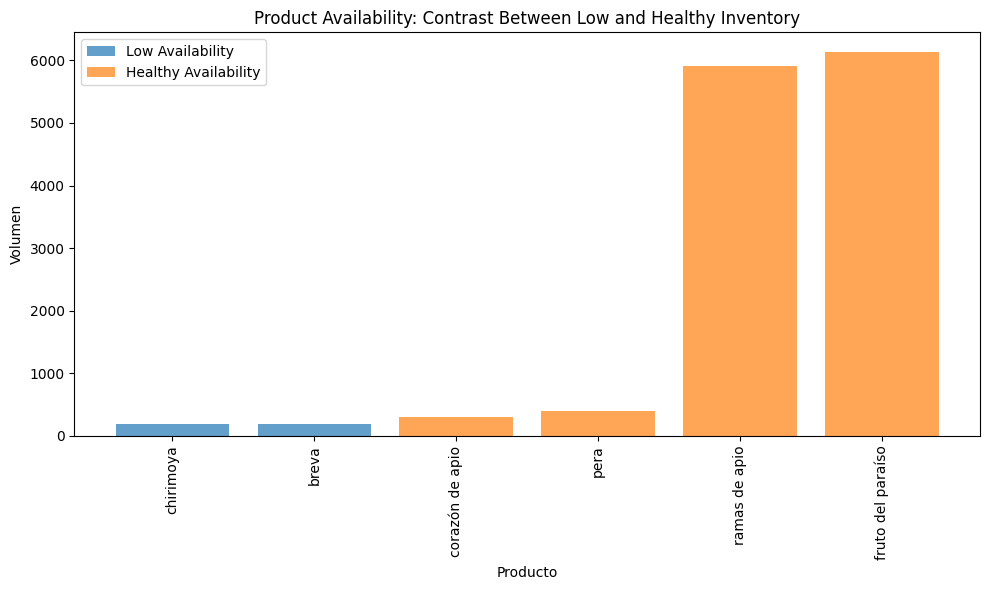

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'critical threshold' for low availability is set at 10% of the average volume
critical_threshold = 0.1 * regional_recommendations['Volumen'].mean()

# Identify products in danger of inventory shortage
low_availability = regional_recommendations[regional_recommendations['Volumen'] < critical_threshold]
healthy_availability = regional_recommendations[regional_recommendations['Volumen'] >= critical_threshold]

# Plotting the contrast
plt.figure(figsize=(10, 6))
plt.bar(low_availability['Producto'], low_availability['Volumen'], label='Low Availability', alpha=0.7)
plt.bar(healthy_availability['Producto'], healthy_availability['Volumen'], label='Healthy Availability', alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Producto')
plt.ylabel('Volumen')
plt.title('Product Availability: Contrast Between Low and Healthy Inventory')
plt.legend()
plt.tight_layout()
plt.show()

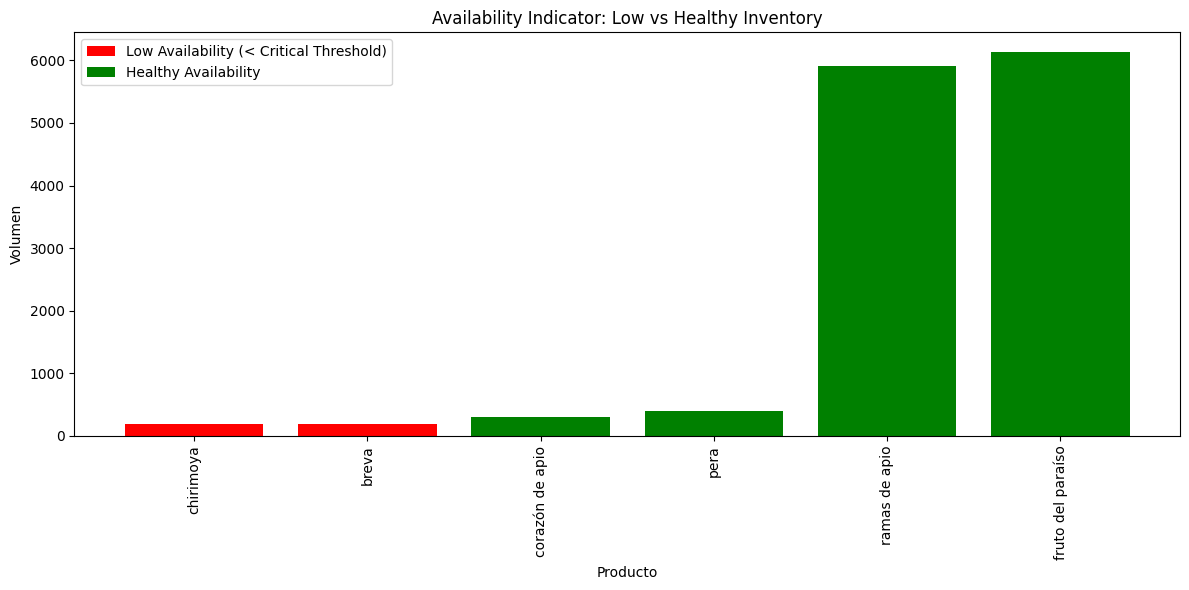

In [ ]:
# Retry visualizing with a simplified approach

# Plot only for low and healthy availability with separate colors
plt.figure(figsize=(12, 6))

# Low availability
plt.bar(low_availability['Producto'], low_availability['Volumen'], color='red', label='Low Availability (< Critical Threshold)')
# Healthy availability
plt.bar(healthy_availability['Producto'], healthy_availability['Volumen'], color='green', label='Healthy Availability')

plt.xticks(rotation=90)
plt.xlabel('Producto')
plt.ylabel('Volumen')
plt.title('Availability Indicator: Low vs Healthy Inventory')
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
import os

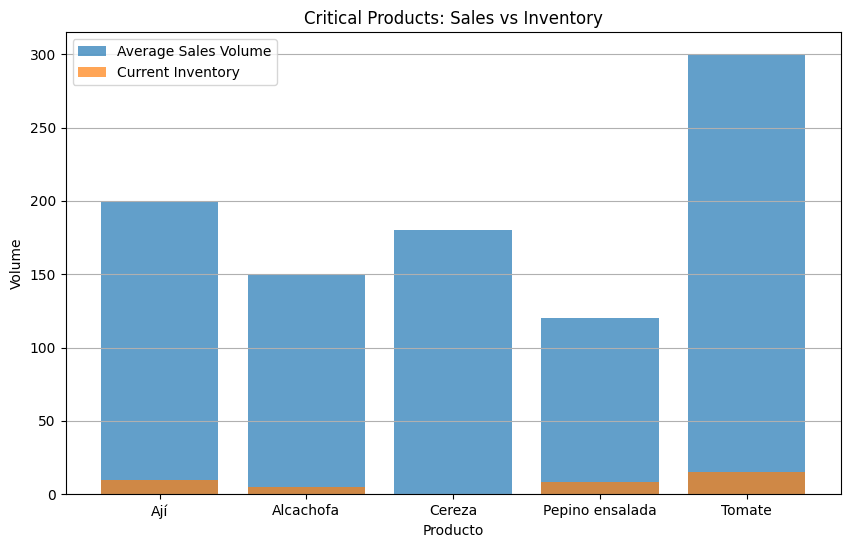

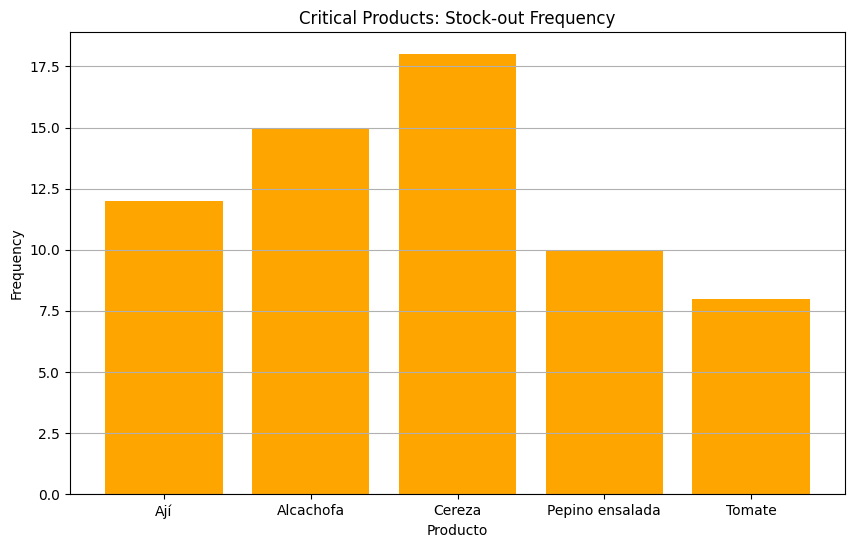

In [ ]:
import matplotlib.pyplot as plt

# Sample data for critical products (Simulating the required columns)
critical_products_data = {
    'Producto': ['Ají', 'Alcachofa', 'Cereza', 'Pepino ensalada', 'Tomate'],
    'Average Sales Volume': [200, 150, 180, 120, 300],
    'Inventory Trend (Current Stock)': [10, 5, 0, 8, 15],
    'Stock-out Frequency': [12, 15, 18, 10, 8]  # Number of days or instances of stock-out
}

# Convert to DataFrame
import pandas as pd
critical_products_df = pd.DataFrame(critical_products_data)

# Bar chart for Average Sales Volume vs. Current Inventory
plt.figure(figsize=(10, 6))
plt.bar(critical_products_df['Producto'], critical_products_df['Average Sales Volume'], label='Average Sales Volume', alpha=0.7)
plt.bar(critical_products_df['Producto'], critical_products_df['Inventory Trend (Current Stock)'], label='Current Inventory', alpha=0.7)
plt.title('Critical Products: Sales vs Inventory')
plt.xlabel('Producto')
plt.ylabel('Volume')
plt.legend()
plt.grid(axis='y')
plt.show()

# Stock-out frequency visualization
plt.figure(figsize=(10, 6))
plt.bar(critical_products_df['Producto'], critical_products_df['Stock-out Frequency'], color='orange')
plt.title('Critical Products: Stock-out Frequency')
plt.xlabel('Producto')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
# Displaying detailed report
!pip install ace_tools

In [ ]:
# Export to CSV
output_file = '/mnt/data/regional_recommendations.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

regional_recommendations.to_csv(output_file, index=False)

output_file

'/mnt/data/regional_recommendations.csv'

Step 2: Analyze Daily Volumes and Trends
Group data by date and product to analyze trends.

In [ ]:
# Group by date and product
limari_daily = limari_data.groupby(['Fecha', 'Producto'])['Volumen'].sum().reset_index()

# Plot daily volume trends for top products
top_products = limari_daily.groupby('Producto')['Volumen'].sum().sort_values(ascending=False).head(5).index

for product in top_products:
    product_data = limari_daily[limari_daily['Producto'] == product]
    plt.plot(product_data['Fecha'], product_data['Volumen'], label=product)

plt.title('Daily Volumen Trends - Comercializadora del Agro de Limarí')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.show()

NameError: name 'limari_data' is not defined

Step 3: Identify Critical Inventory Levels
Calculate critical inventory levels for each product.

In [ ]:
# Calculate mean and standard deviation of volumes
limari_critical_levels = limari_daily.groupby('Producto')['Volumen'].agg(['mean', 'std']).reset_index()
limari_critical_levels['Critical_Level'] = limari_critical_levels['mean'] - limari_critical_levels['std']

# Merge back with daily data to identify critical days
limari_daily = pd.merge(limari_daily, limari_critical_levels[['Producto', 'Critical_Level']], on='Producto')
limari_critical_days = limari_daily[limari_daily['Volumen'] < limari_daily['Critical_Level']]

print("Critical Inventory Days for Comercializadora del Agro de Limarí:")
print(limari_critical_days)

# Export to CSV
output_file = '/mnt/data/Critical Inventory Days for Comercializadora del Agro de Limarí.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

regional_recommendations.to_csv(output_file, index=False)

output_file

NameError: name 'limari_daily' is not defined

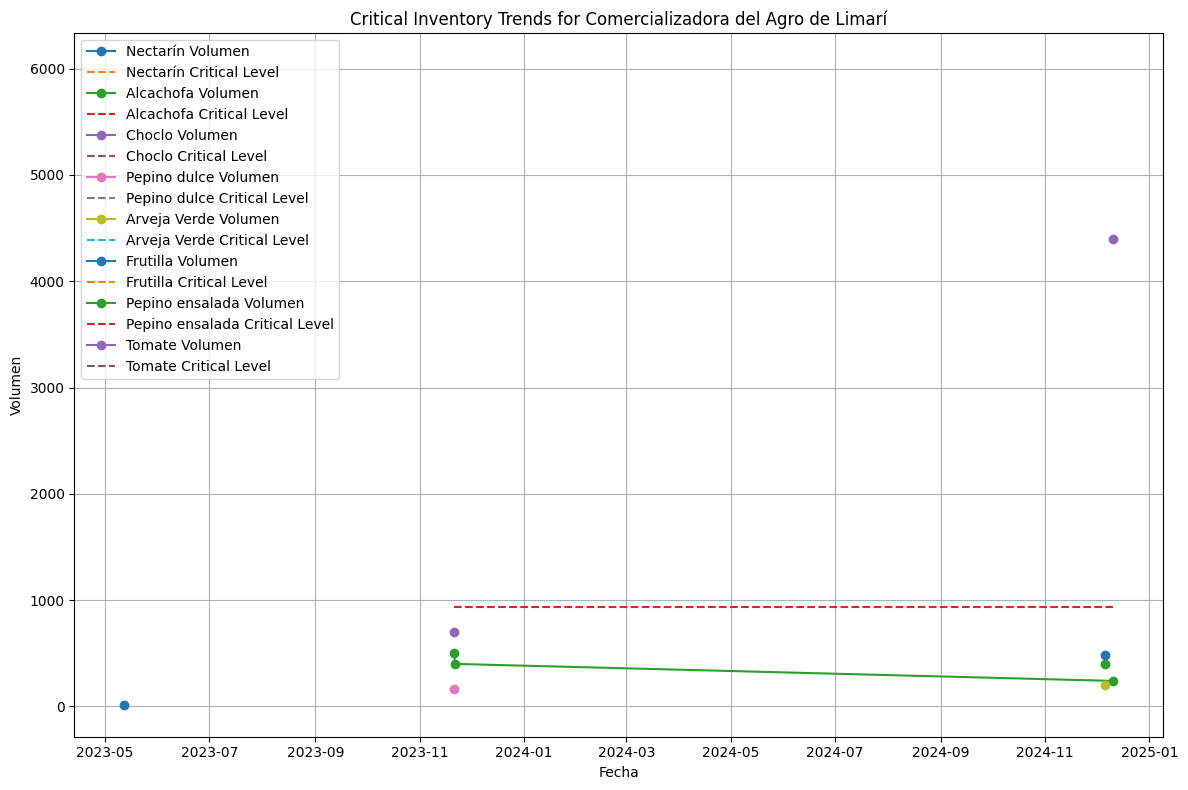

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for Critical Inventory Days
data = {
    'Fecha': [
        '2023-05-12', '2023-11-21', '2023-11-21', '2023-11-21', '2023-11-22',
        '2024-12-06', '2024-12-06', '2024-12-06', '2024-12-11', '2024-12-11'
    ],
    'Producto': [
        'Nectarín', 'Alcachofa', 'Choclo', 'Pepino dulce', 'Alcachofa',
        'Arveja Verde', 'Frutilla', 'Pepino ensalada', 'Alcachofa', 'Tomate'
    ],
    'Volumen': [16, 500, 700, 160, 400, 200, 480, 400, 240, 4400],
    'Critical_Level': [28.12, 939.99, 6035.83, 488.39, 939.99, 229.64, 566.15, 453.54, 939.99, 4634.21]
}

critical_days_df = pd.DataFrame(data)
critical_days_df['Fecha'] = pd.to_datetime(critical_days_df['Fecha'])

# Plot trends for each product
plt.figure(figsize=(12, 8))

for product in critical_days_df['Producto'].unique():
    product_data = critical_days_df[critical_days_df['Producto'] == product]
    plt.plot(product_data['Fecha'], product_data['Volumen'], label=f"{product} Volumen", marker='o')
    plt.plot(product_data['Fecha'], product_data['Critical_Level'], linestyle='--', label=f"{product} Critical Level")

plt.title("Critical Inventory Trends for Comercializadora del Agro de Limarí")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.legend()
plt.grid()
plt.tight_layout()

# Show plot
plt.show()

Step 4: Predict Inventory Breaks
Fit a predictive model to forecast inventory levels for top products.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Iterate through top products
for product in top_products:
    product_data = limari_daily[limari_daily['Producto'] == product]
    product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
    product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())

    # Train-Test Split - Adjust split based on data size
    if len(product_data) > 30:
        train_size = len(product_data) - 30  # Ensure train data has at least one sample
        train = product_data.iloc[:train_size]
        test = product_data.iloc[train_size:]
    else:
        # Handle cases with less than 30 data points (e.g., skip or use all data for training)
        print(f"Insufficient data for {product}. Skipping...")
        continue

    # Train model
    model = RandomForestRegressor()
    model.fit(train[['Fecha_ordinal']], train['Volumen'])

    # Predict future inventory levels
    future_dates = pd.date_range(start=product_data['Fecha'].max(), periods=30)
    future_dates_ordinal = [d.toordinal() for d in future_dates]
    future_predictions = model.predict(pd.DataFrame(future_dates_ordinal, columns=['Fecha_ordinal']))

    # Identify potential inventory breaks
    future_breaks = future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]]
    print(f"Predicted Inventory Breaks for {product}: {len(future_breaks)} days")

<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-40-482f2ecbd920>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Insufficient data for Choclo. Skipping...
Predicted Inventory Breaks for Tomate: 0 days
Predicted Inventory Breaks for Mandarina: 0 days
Predicted Inventory Breaks for Limón: 0 days


<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-40-482f2ecbd920>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-40-482f2ecbd920>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

Predicted Inventory Breaks for Pimiento: 0 days


In [ ]:
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ... (Your existing code for data preparation and model training) ...

# Plotting the results
for product in top_products:
    # ... (Your existing code for data preparation and model training for each product) ...

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(product_data['Fecha'], product_data['Volumen'], label='Actual Volume', marker='o')  # Actual data
    plt.plot(future_dates, future_predictions, label='Predicted Volume', linestyle='--')  # Predicted data
    plt.axhline(product_data['Critical_Level'].iloc[0], color='red', linestyle='-', label='Critical Level')  # Critical level

    # Highlight potential breaks
    break_dates = future_dates[future_predictions < product_data['Critical_Level'].iloc[0]]
    plt.scatter(break_dates, future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]], color='red', marker='x', s=100, label='Potential Breaks')

    plt.title(f'Inventory Prediction for {product}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

NameError: name 'top_products' is not defined

Step 5: Market Prescriptive Analysis
Recommend products to cultivate for Comercializadora del Agro de Limarí.

High-demand products: Identify products with consistently high volumes and prices.
Critical inventory products: Focus on products with frequent inventory breaks.

In [ ]:
# Aggregate data for recommendations
limari_recommendations = limari_daily.groupby('Producto').agg({
    'Volumen': 'sum',
    'Critical_Level': 'mean'
}).reset_index()

# Merge with price data
average_prices = limari_data.groupby('Producto')['Precio promedio ponderado'].mean().reset_index()
limari_recommendations = pd.merge(limari_recommendations, average_prices, on='Producto')

# Prioritize products with high prices and critical inventory
limari_recommendations = limari_recommendations.sort_values(by=['Critical_Level', 'Precio promedio ponderado'], ascending=[True, False])

print("Recommended Products for Comercializadora del Agro de Limarí:")
print(limari_recommendations)

# Save recommendations to CSV
limari_recommendations.to_csv('limari_recommendations.csv')
files.download('limari_recommendations.csv')

Recommended Products for Comercializadora del Agro de Limarí:
            Producto  Volumen  Critical_Level  Precio promedio ponderado
9            Durazno     7858      -23.500374              274905.462132
7            Ciruela      654       19.050357              246422.893424
14           Naranja     4900       27.112689              165429.767360
15          Nectarín     1892       28.120037              338144.740600
8            Damasco     2830      110.287012               21728.691425
3    Arándano (blue)     8700      154.170134                7707.457934
0                Ají    28760      155.996317               26377.331372
2       Arveja Verde    27500      229.641271               22807.017493
25  Zapallo italiano    17340      262.337541                9771.908723
21      Poroto verde    40400      282.217324               21218.487337
20    Poroto granado    12640      322.900101               20990.135126
24               Uva    38530      332.460297                9

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())
<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Insufficient data for Choclo. Skipping...
Predicted Inventory Breaks for Tomate: 0 days


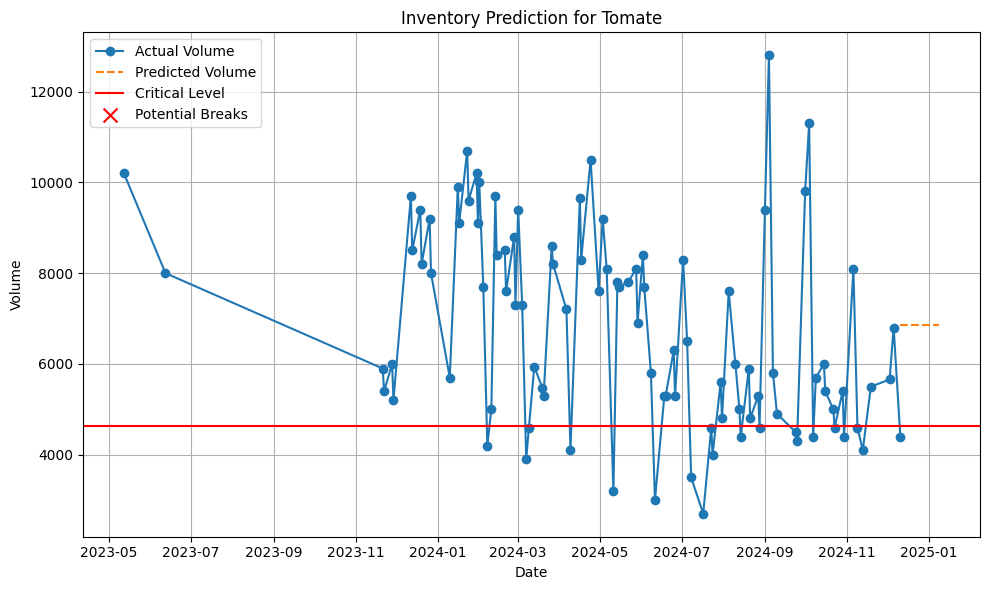

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())


Predicted Inventory Breaks for Mandarina: 0 days


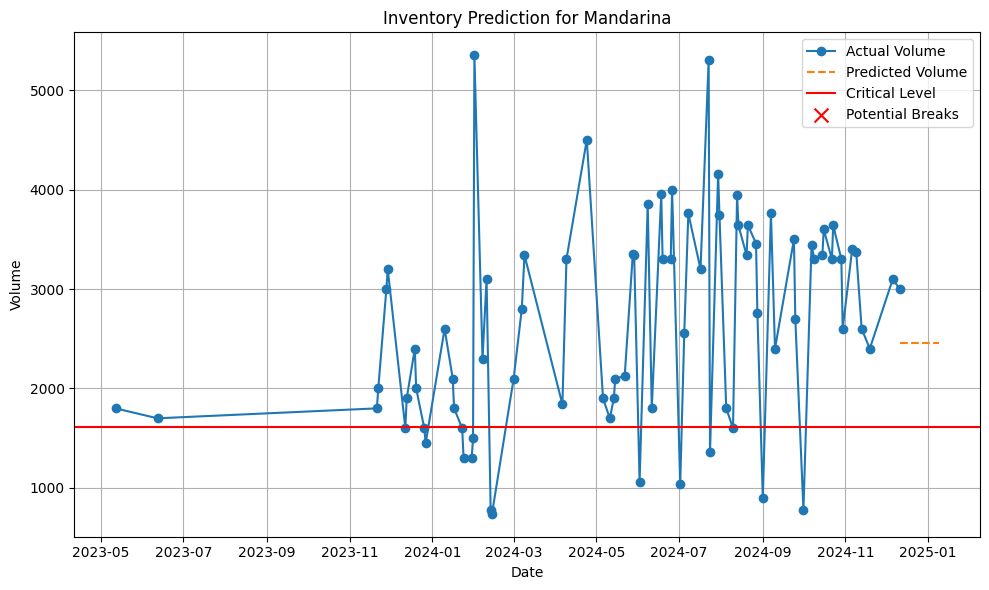

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())


Predicted Inventory Breaks for Limón: 0 days


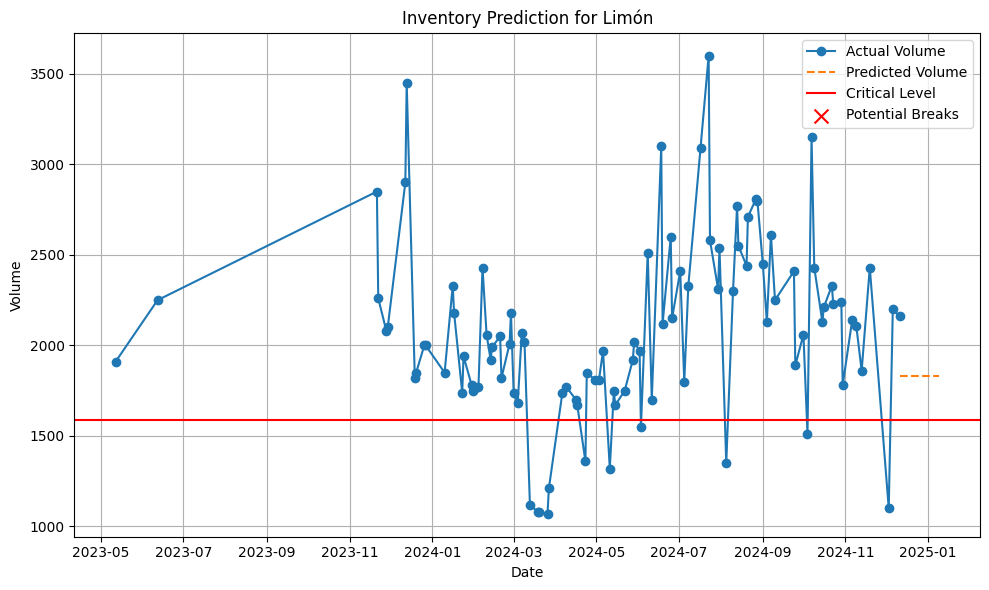

<ipython-input-43-79631f80280d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
<ipython-input-43-79631f80280d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())


Predicted Inventory Breaks for Pimiento: 0 days


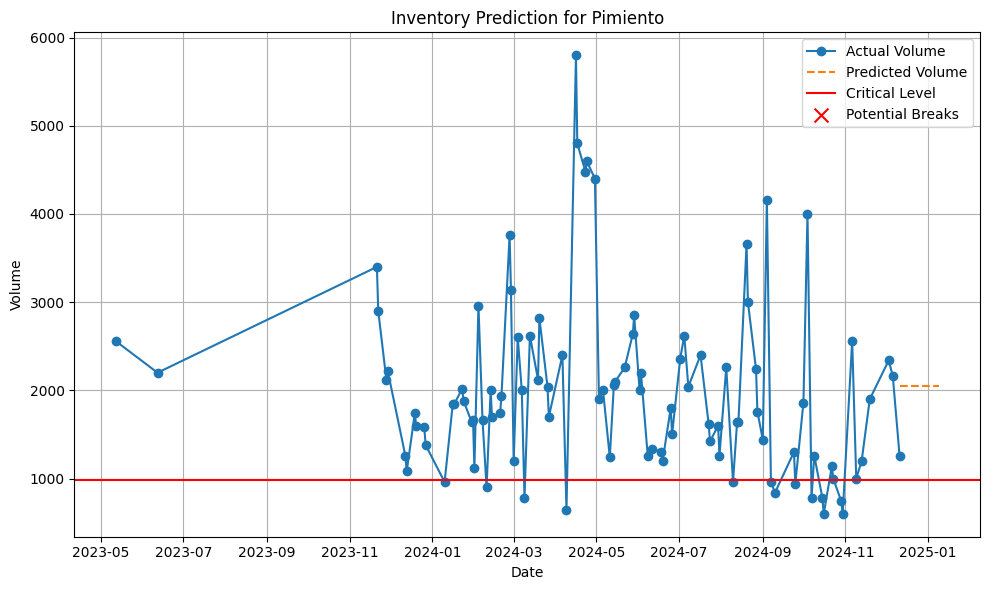

In [ ]:
!pip install matplotlib pandas scikit-learn

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming 'limari_daily' and 'top_products' are already defined
# ... (Your existing code for data preparation) ...

for product in top_products:
    product_data = limari_daily[limari_daily['Producto'] == product]
    product_data['Fecha'] = pd.to_datetime(product_data['Fecha'])
    product_data['Fecha_ordinal'] = product_data['Fecha'].apply(lambda x: x.toordinal())

    # Train-Test Split - Adjust split based on data size
    if len(product_data) > 30:
        train_size = len(product_data) - 30  # Ensure train data has at least one sample
        train = product_data.iloc[:train_size]
        test = product_data.iloc[train_size:]
    else:
        # Handle cases with less than 30 data points (e.g., skip or use all data for training)
        print(f"Insufficient data for {product}. Skipping...")
        continue

    # Train model
    model = RandomForestRegressor()
    model.fit(train[['Fecha_ordinal']], train['Volumen'])

    # Predict future inventory levels
    future_dates = pd.date_range(start=product_data['Fecha'].max(), periods=30)
    future_dates_ordinal = [d.toordinal() for d in future_dates]
    future_predictions = model.predict(pd.DataFrame(future_dates_ordinal, columns=['Fecha_ordinal']))

    # Identify potential inventory breaks
    future_breaks = future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]]
    print(f"Predicted Inventory Breaks for {product}: {len(future_breaks)} days")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(product_data['Fecha'], product_data['Volumen'], label='Actual Volume', marker='o')
    plt.plot(future_dates, future_predictions, label='Predicted Volume', linestyle='--')
    plt.axhline(product_data['Critical_Level'].iloc[0], color='red', linestyle='-', label='Critical Level')

    # Highlight potential breaks
    break_dates = future_dates[future_predictions < product_data['Critical_Level'].iloc[0]]
    plt.scatter(break_dates, future_predictions[future_predictions < product_data['Critical_Level'].iloc[0]], color='red', marker='x', s=100, label='Potential Breaks')

    plt.title(f'Inventory Prediction for {product}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

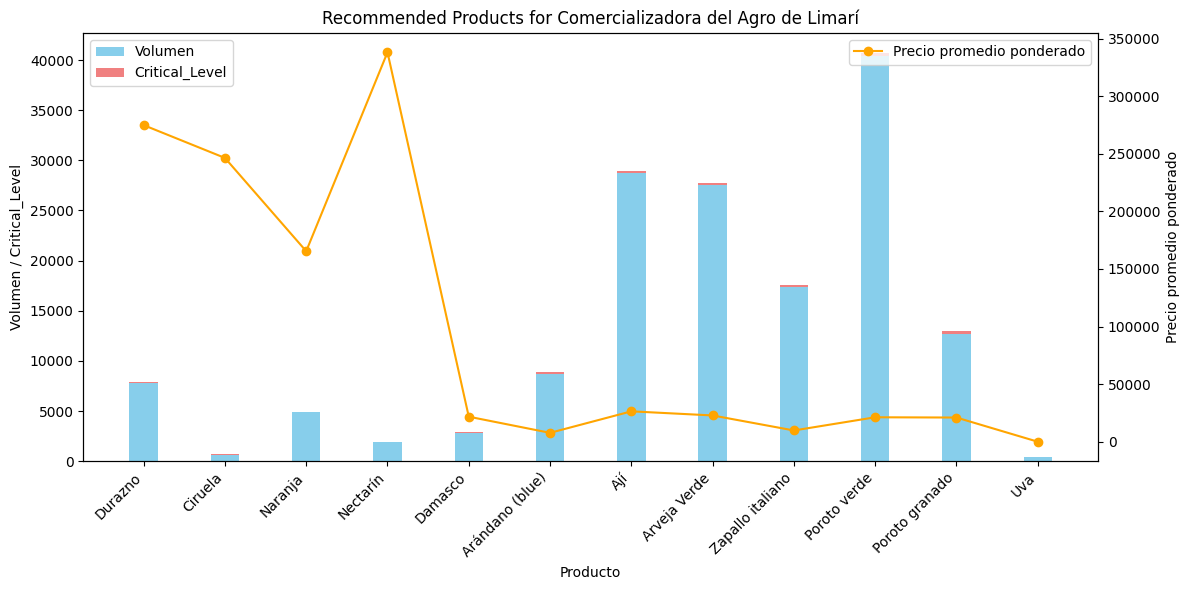

In [ ]:
!pip install matplotlib pandas

import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Producto': ['Durazno', 'Ciruela', 'Naranja', 'Nectarín', 'Damasco', 'Arándano (blue)', 'Ají', 'Arveja Verde', 'Zapallo italiano', 'Poroto verde', 'Poroto granado', 'Uva'],
    'Volumen': [7858, 654, 4900, 1892, 2830, 8700, 28760, 27500, 17340, 40400, 12640, 385],
    'Critical_Level': [-23.500374, 19.050357, 27.112689, 28.120037, 110.287012, 154.170134, 155.996317, 229.641271, 262.337541, 282.217324, 322.900101, 0],  # Assuming 0 for Uva
    'Precio promedio ponderado': [274905.462132, 246422.893424, 165429.767360, 338144.740600, 21728.691425, 7707.457934, 26377.331372, 22807.017493, 9771.908723, 21218.487337, 20990.135126, 0]  # Assuming 0 for Uva
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Volumen and Critical_Level
width = 0.35
ax1.bar(df['Producto'], df['Volumen'], width, label='Volumen', color='skyblue')
ax1.bar(df['Producto'], df['Critical_Level'], width, label='Critical_Level', color='lightcoral', bottom=df['Volumen'])

ax1.set_ylabel('Volumen / Critical_Level')
ax1.set_xlabel('Producto')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax1.legend(loc='upper left')

# Line plot for Precio promedio ponderado
ax2 = ax1.twinx()
ax2.plot(df['Producto'], df['Precio promedio ponderado'], color='orange', marker='o', label='Precio promedio ponderado')
ax2.set_ylabel('Precio promedio ponderado')
ax2.legend(loc='upper right')

plt.title('Recommended Products for Comercializadora del Agro de Limarí')
plt.tight_layout()
plt.show()